# Natural Language Processing
El procesamiento del lenguaje natural (NLP) es una rama de la inteligencia artificial que permite a las máquinas entender, interpretar y manipular el lenguaje humano. En esta notebook, nos enfocaremos en el análisis de sentimientos, una aplicación común de NLP que busca determinar la polaridad emocional de un texto. Utilizaremos el dataset de IMDb, que contiene reseñas de películas etiquetadas como positivas o negativas.

# Caso Análisis de Sentimientos

## Herramientas de Procesamiento de Lenguaje Natural y Análisis de Texto

### NLTK (Natural Language Toolkit)
NLTK es una biblioteca líder para la programación en Python de procesos del lenguaje humano. Proporciona interfaces fáciles de usar a más de 50 recursos léxicos corporales y léxicos, como WordNet, junto con una suite de bibliotecas de procesamiento de texto para la clasificación, tokenización, stemming, etiquetado, análisis sintáctico y razonamiento semántico. Es adecuado tanto para investigadores académicos como para desarrolladores industriales.

### Gensim
Gensim es una biblioteca de Python para modelado de temas y procesamiento de lenguaje natural, específicamente diseñada para descubrir la estructura semántica de documentos analizando las relaciones estadísticas entre palabras. Permite al usuario manejar grandes colecciones de texto utilizando algoritmos de espacio vectorial como LDA y similaridades de documentos. Es muy eficiente y escalable, y se utiliza comúnmente en la industria y la academia para tareas de modelado de temas y similitudes de documentos.

### BeautifulSoup
BeautifulSoup es una biblioteca que facilita raspar información de páginas web, permitiendo el parseo de documentos HTML y XML. Se utiliza comúnmente para tareas de web scraping debido a su capacidad para transformar documentos HTML complejos en un árbol de objetos Python comprensible y navegable. Esto permite a los usuarios acceder a elementos específicos del documento de forma rápida y extraer datos de manera eficiente.

Estas herramientas son fundamentales en el campo del procesamiento del lenguaje natural y el análisis de texto, proporcionando capacidades que abarcan desde la preparación y limpieza de texto hasta el análisis avanzado y modelado de temas.


# Preparación del entorno

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Configuración visual para los gráficos
sns.set(style="whitegrid")

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Carga de datos

In [3]:
import os
from google.colab import drive

# Verificar si Google Drive ya está montado
if not os.path.ismount('/content/drive'):
    # Montar Google Drive
    drive.mount('/content/drive')
else:
    print("Google Drive ya está montado.")

# Definir la ruta a tu directorio de trabajo
work_dir = '/content/drive/My Drive/Colab Notebooks/M1000IA - 2024'

# Verificar si el directorio existe
if os.path.exists(work_dir):
    # Cambiar al directorio de trabajo
    os.chdir(work_dir)
    print(f"Directorio cambiado a: {work_dir}")

    # Listar los archivos en el directorio de trabajo
    print("Contenido del directorio:")
    !ls
else:
    print(f"El directorio {work_dir} no existe. Verifica la ruta.")

Google Drive ya está montado.
Directorio cambiado a: /content/drive/My Drive/Colab Notebooks/M1000IA - 2024
Contenido del directorio:
'=0.21.0'      'Introducción a Python con Google Colab.ipynb'   results
 BERT.ipynb     Natural_Language_Processing_BERT.ipynb	        ryanair_reviews.csv
 bigrams.html  'Natural Language Processing  - Proceso.ipynb'


In [4]:
import os
import pandas as pd

# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# List the contents of the current directory
print("Directory contents:")
!ls

# Specify the full path to the file
file_path = "/content/drive/MyDrive/Colab Notebooks/M1000IA - 2024/ryanair_reviews.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)

df

Current working directory: /content/drive/My Drive/Colab Notebooks/M1000IA - 2024
Directory contents:
'=0.21.0'      'Introducción a Python con Google Colab.ipynb'   results
 BERT.ipynb     Natural_Language_Processing_BERT.ipynb	        ryanair_reviews.csv
 bigrams.html  'Natural Language Processing  - Proceso.ipynb'
      Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United K

Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United Kingdom   
2260        2260     2012-08-28             1.0         Australia   
2261        2261     2012-08-23             2.0    United Kingdom   

      Trip_verified                             Comment title  \
0     Trip Verified                  "lack of responsibility"   
1     Trip Verified                      "a classic rip off"    
2     Trip Verified  “refused to book me onto another flight”   
3     Trip Verified      “lost my luggage on a direct flight”   
4     Trip Verified          "incompetent to help passengers"   
...             ...                                       ...   
2257            NaN                   Ryanair customer review   
2258            NaN                   Ryanair customer review   
2259            NaN                   Ryanair customer review   
2260            NaN                   Ryanair customer review   
2261            NaN                   Ryanair customer review   

                                                Comment Type Of Traveller  \
0     It was really bad, after finding out that ther...    Family Leisure   
1     We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2     We all know Ryanair is garbage, but here is an...          Business   
3     Ryanair lost my luggage on a direct flight. I ...          Business   
4     Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   
...                                                 ...               ...   
2257  Myself and my daughter took a holiday to Kos. ...               NaN   
2258  Stansted to Pula. Tried to adhere to all rules...               NaN   
2259  When printing the boarding tickets we got our ...               NaN   
2260  Budapest - Manchester and back again with a 5 ...               NaN   
2261  Stansted to Barcelona. Fine going there. Horre...               NaN   

          Seat Type                      Origin  ...     Date Flown  \
0     Economy Class                  Birmingham  ...     April 2024   
1     Economy Class              Paris Beauvais  ...     April 2024   
2     Economy Class                     Limoges  ...  February 2024   
3     Economy Class  Charleroi (Brussels South)  ...     April 2024   
4     Economy Class                       Basel  ...     April 2024   
...             ...                         ...  ...            ...   
2257  Economy Class                         NaN  ...            NaN   
2258  Economy Class                         NaN  ...            NaN   
2259  Economy Class                         NaN  ...            NaN   
2260  Economy Class                         NaN  ...            NaN   
2261  Economy Class                         NaN  ...            NaN   

     Ground Service  Value For Money  Recommended Seat Comfort  \
0               1.0              1.0           no          NaN   
1               1.0              1.0           no          1.0   
2               3.0              3.0           no          3.0   
3               1.0              1.0           no          2.0   
4               1.0              1.0           no          1.0   
...             ...              ...          ...          ...   
2257            NaN              1.0           no          1.0   
2258            NaN              1.0           no          3.0   
2259            NaN     

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df

Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United Kingdom   
2260        2260     2012-08-28             1.0         Australia   
2261        2261     2012-08-23             2.0    United Kingdom   

      Trip_verified                             Comment title  \
0     Trip Verified                  "lack of responsibility"   
1     Trip Verified                      "a classic rip off"    
2     Trip Verified  “refused to book me onto another flight”   
3     Trip Verified      “lost my luggage on a direct flight”   
4     Trip Verified          "incompetent to help passengers"   
...             ...                                       ...   
2257            NaN                   Ryanair customer review   
2258            NaN                   Ryanair customer review   
2259            NaN                   Ryanair customer review   
2260            NaN                   Ryanair customer review   
2261            NaN                   Ryanair customer review   

                                                Comment Type Of Traveller  \
0     It was really bad, after finding out that ther...    Family Leisure   
1     We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2     We all know Ryanair is garbage, but here is an...          Business   
3     Ryanair lost my luggage on a direct flight. I ...          Business   
4     Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   
...                                                 ...               ...   
2257  Myself and my daughter took a holiday to Kos. ...               NaN   
2258  Stansted to Pula. Tried to adhere to all rules...               NaN   
2259  When printing the boarding tickets we got our ...               NaN   
2260  Budapest - Manchester and back again with a 5 ...               NaN   
2261  Stansted to Barcelona. Fine going there. Horre...               NaN   

          Seat Type                      Origin  ...     Date Flown  \
0     Economy Class                  Birmingham  ...     April 2024   
1     Economy Class              Paris Beauvais  ...     April 2024   
2     Economy Class                     Limoges  ...  February 2024   
3     Economy Class  Charleroi (Brussels South)  ...     April 2024   
4     Economy Class                       Basel  ...     April 2024   
...             ...                         ...  ...            ...   
2257  Economy Class                         NaN  ...            NaN   
2258  Economy Class                         NaN  ...            NaN   
2259  Economy Class                         NaN  ...            NaN   
2260  Economy Class                         NaN  ...            NaN   
2261  Economy Class                         NaN  ...            NaN   

     Ground Service  Value For Money  Recommended Seat Comfort  \
0               1.0              1.0           no          NaN   
1               1.0              1.0           no          1.0   
2               3.0              3.0           no          3.0   
3               1.0              1.0           no          2.0   
4               1.0              1.0           no          1.0   
...             ...              ...          ...          ...   
2257            NaN              1.0           no          1.0   
2258            NaN              1.0           no          3.0   
2259            NaN     

# Análisis Exploratorio de Datos (EDA)


El análisis exploratorio de datos nos permite entender mejor la naturaleza de los datos con los que estamos trabajando. Exploraremos la distribución de las reseñas positivas y negativas y visualizaremos las palabras más comunes en cada tipo de reseña.



In [5]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity'],
      dtype='object')

In [6]:
df['Overall Rating'].value_counts()

Overall Rating
1.0     865
10.0    263
8.0     198
2.0     184
9.0     177
7.0     123
3.0     103
5.0      84
6.0      77
4.0      57
Name: count, dtype: int64

In [7]:
# todos los missing
df["Comment"]= df["Comment"].fillna("Missing")

In [8]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['Overall Rating'] <= 4.0:
        val = 'Negativo'
    elif row['Overall Rating'] < 7.0:
        val = 'Neutral'
    elif row['Overall Rating'] >= 7.0:
        val = 'Positive'
    else:
        val = -1
    return val
  #Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)
df.head()

Unnamed: 0 Date Published  Overall Rating Passenger Country  Trip_verified  \
0           0     2024-04-29             1.0          Portugal  Trip Verified   
1           1     2024-04-25             1.0            France  Trip Verified   
2           2     2024-04-22             1.0            France  Trip Verified   
3           3     2024-04-08             1.0            Jordan  Trip Verified   
4           4     2024-04-08             1.0       Switzerland  Trip Verified   

                              Comment title  \
0                  "lack of responsibility"   
1                      "a classic rip off"    
2  “refused to book me onto another flight”   
3      “lost my luggage on a direct flight”   
4          "incompetent to help passengers"   

                                             Comment Type Of Traveller  \
0  It was really bad, after finding out that ther...    Family Leisure   
1  We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2  We all know Ryanair is garbage, but here is an...          Business   
3  Ryanair lost my luggage on a direct flight. I ...          Business   
4  Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   

       Seat Type                      Origin  ... Ground Service  \
0  Economy Class                  Birmingham  ...            1.0   
1  Economy Class              Paris Beauvais  ...            1.0   
2  Economy Class                     Limoges  ...            3.0   
3  Economy Class  Charleroi (Brussels South)  ...            1.0   
4  Economy Class                       Basel  ...            1.0   

  Value For Money  Recommended  Seat Comfort Cabin Staff Service  Aircraft  \
0             1.0           no           NaN                 NaN       NaN   
1             1.0           no           1.0                 1.0       NaN   
2             3.0           no           3.0                 3.0       NaN   
3             1.0           no           2.0                 1.0       NaN   
4             1.0           no           1.0                 1.0       NaN   

   Food & Beverages Inflight Entertainment  Wifi & Connectivity  sentiment  
0               NaN                    NaN                  NaN   Negativo  
1               NaN                    NaN                  NaN   Negativo  
2               NaN                    NaN                  NaN   Negativo  
3               NaN                    NaN                  NaN   Negativo  
4               NaN                    NaN                  NaN   Negativo  

[5 rows x 22 columns]

In [9]:
df['sentiment'].value_counts()

sentiment
Negativo    1209
Positive     761
Neutral      161
-1           131
Name: count, dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Date Flown', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'sentiment'],
      dtype='object')

# Analisis de las fechas

In [12]:
import pandas as pd

# Asegurarse de que la columna 'Date Published' esté en formato datetime
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Extraer el año, mes y día
df['year'] = df['Date Published'].dt.year
df['month'] = df['Date Published'].dt.month
df['day'] = df['Date Published'].dt.day

# Eliminar la columna original 'Date Published' si es necesario
df = df.drop(['Date Published'], axis=1)


In [13]:
# Arreglo la fecha de vuelo
import pandas as pd

# Asegurarse de que la columna 'Date Published' esté en formato datetime
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Extraer el año, mes y día
df['year_vuelo'] = df['Date Flown'].dt.year
df['month_vuelo'] = df['Date Flown'].dt.month
df['day_vuelo'] = df['Date Flown'].dt.day

# Eliminar la columna original 'Date Published' si es necesario
df = df.drop(['Date Flown'], axis=1)


<ipython-input-13-2a23eaf20a1b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Flown'] = pd.to_datetime(df['Date Flown'])


In [14]:

# Mostrar las primeras filas del DataFrame modificado
df.head()

Unnamed: 0  Overall Rating Passenger Country  Trip_verified  \
0           0             1.0          Portugal  Trip Verified   
1           1             1.0            France  Trip Verified   
2           2             1.0            France  Trip Verified   
3           3             1.0            Jordan  Trip Verified   
4           4             1.0       Switzerland  Trip Verified   

                              Comment title  \
0                  "lack of responsibility"   
1                      "a classic rip off"    
2  “refused to book me onto another flight”   
3      “lost my luggage on a direct flight”   
4          "incompetent to help passengers"   

                                             Comment Type Of Traveller  \
0  It was really bad, after finding out that ther...    Family Leisure   
1  We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2  We all know Ryanair is garbage, but here is an...          Business   
3  Ryanair lost my luggage on a direct flight. I ...          Business   
4  Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   

       Seat Type                      Origin    Destination  ...  \
0  Economy Class                  Birmingham          Porto  ...   
1  Economy Class              Paris Beauvais         Poznan  ...   
2  Economy Class                     Limoges     Manchester  ...   
3  Economy Class  Charleroi (Brussels South)  Amman, Jordan  ...   
4  Economy Class                       Basel         Dublin  ...   

   Food & Beverages  Inflight Entertainment Wifi & Connectivity  sentiment  \
0               NaN                     NaN                 NaN   Negativo   
1               NaN                     NaN                 NaN   Negativo   
2               NaN                     NaN                 NaN   Negativo   
3               NaN                     NaN                 NaN   Negativo   
4               NaN                     NaN                 NaN   Negativo   

   year month  day  year_vuelo  month_vuelo day_vuelo  
0  2024     4   29      2024.0          4.0       1.0  
1  2024     4   25      2024.0          4.0       1.0  
2  2024     4   22      2024.0          2.0       1.0  
3  2024     4    8      2024.0          4.0       1.0  
4  2024     4    8      2024.0          4.0       1.0  

[5 rows x 26 columns]

# Analisis de distribucion de calificaciones

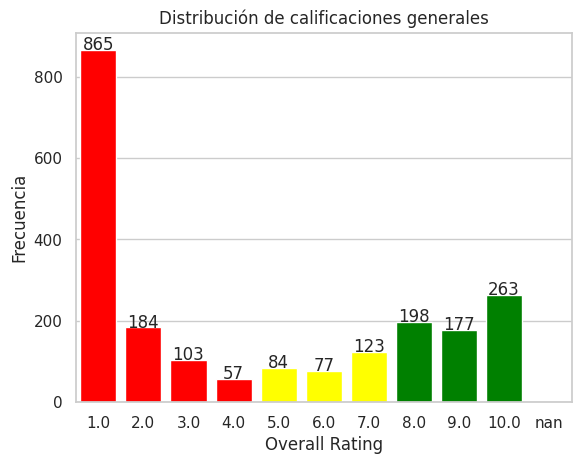

In [15]:
# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de barras
sns.countplot(x='Overall Rating', data=df, order=sorted(df['Overall Rating'].unique()), ax=ax)

# Aplicar los colores a las barras
for patch in ax.patches:
    value = int(patch.get_x() + patch.get_width() / 2.0 + 0.5)  # Ajuste para obtener el valor correcto
    if value <= 3:
        patch.set_facecolor('red')
    elif 4 <= value <= 6:
        patch.set_facecolor('yellow')
    else:
        patch.set_facecolor('green')

    # Agregar la cuenta de frecuencia sobre cada barra
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2., height + 0.1,
            '{:.0f}'.format(height), ha="center")

plt.title('Distribución de calificaciones generales')
plt.xlabel('Overall Rating')
plt.ylabel('Frecuencia')
plt.show()

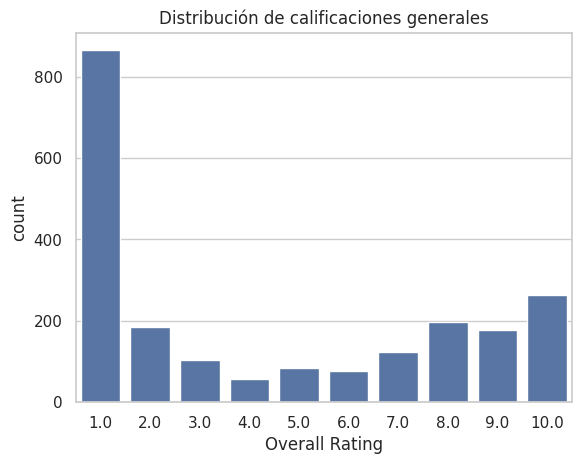

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para mostrar la distribución de calificaciones generales
sns.countplot(x='Overall Rating', data=df)
plt.title('Distribución de calificaciones generales')
plt.show()


# Analisis de sentimiento

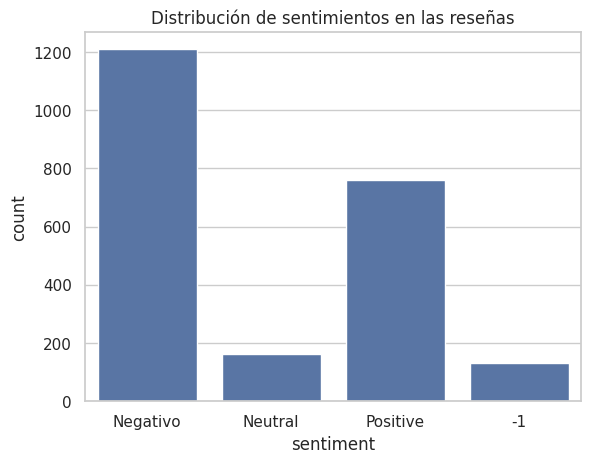

In [11]:
# Suponiendo que la columna 'sentiment' ya contiene valores como 'positive', 'neutral', 'negative'
sns.countplot(x='sentiment', data=df)
plt.title('Distribución de sentimientos en las reseñas')
plt.show()


# Analisis de calificacion y tipo de pasajero

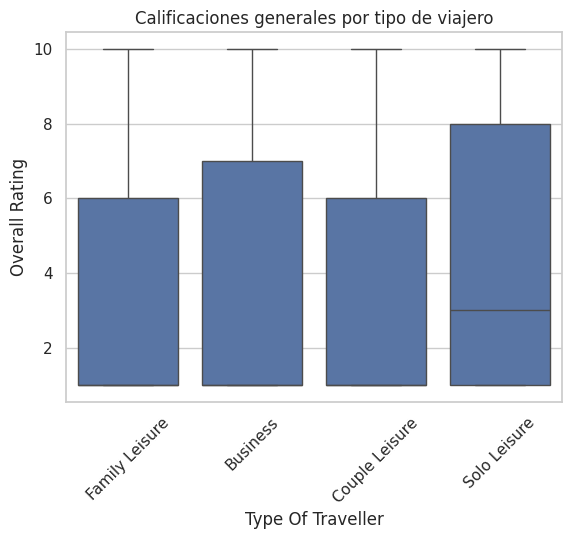

In [18]:
sns.boxplot(x='Type Of Traveller', y='Overall Rating', data=df)
plt.title('Calificaciones generales por tipo de viajero')
plt.xticks(rotation=45)
plt.show()


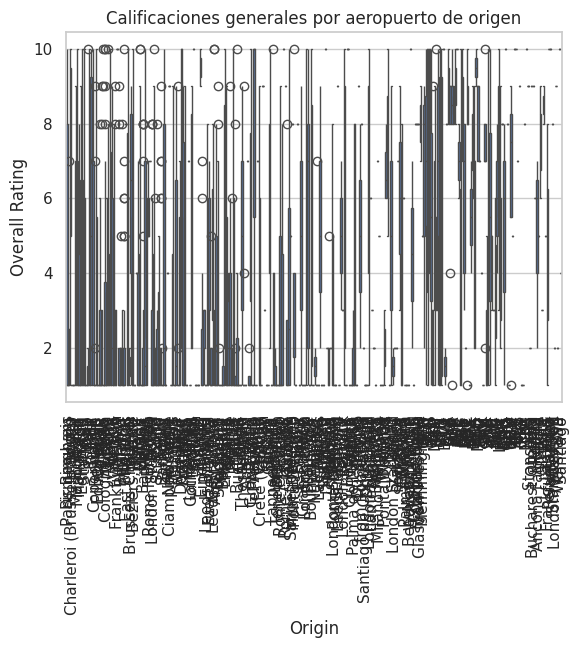

In [19]:
# Ejemplo con el origen
sns.boxplot(x='Origin', y='Overall Rating', data=df)
plt.title('Calificaciones generales por aeropuerto de origen')
plt.xticks(rotation=90)
plt.show()


Calidad precio

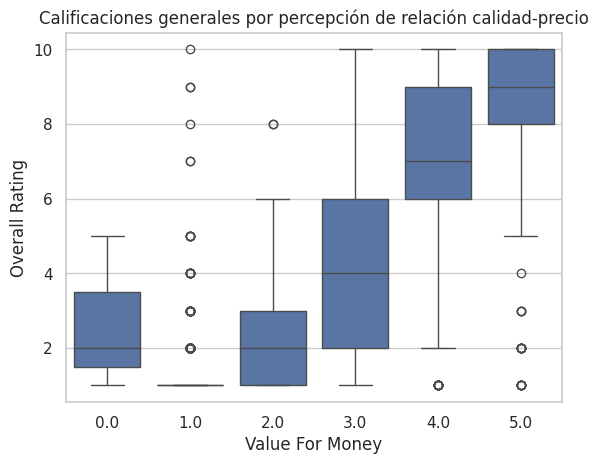

In [20]:
sns.boxplot(x='Value For Money', y='Overall Rating', data=df)
plt.title('Calificaciones generales por percepción de relación calidad-precio')
plt.show()


In [21]:
df.columns

Index(['Unnamed: 0', 'Overall Rating', 'Passenger Country', 'Trip_verified',
       'Comment title', 'Comment', 'Type Of Traveller', 'Seat Type', 'Origin',
       'Destination', 'Ground Service', 'Value For Money', 'Recommended',
       'Seat Comfort', 'Cabin Staff Service', 'Aircraft', 'Food & Beverages',
       'Inflight Entertainment', 'Wifi & Connectivity', 'sentiment', 'year',
       'month', 'day', 'year_vuelo', 'month_vuelo', 'day_vuelo'],
      dtype='object')

# 6. Análisis de comentarios textuales
Para los comentarios, puedes usar técnicas de procesamiento de lenguaje natural (NLP) para extraer temas y realizar un análisis de sentimientos más detallado.

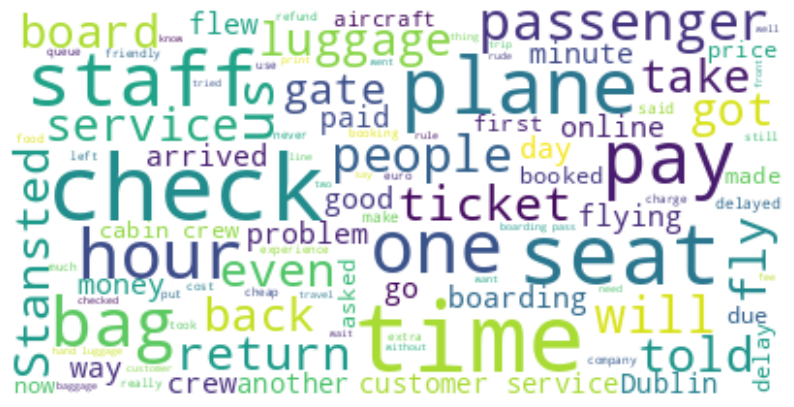

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Lista de palabras que quieres excluir
excluded_words = {'Ryanair', 'flight', "u", 'flights', 'airline', "airport", 'not', "and", "the", "for", "that"}

# Unir todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comment.dropna())

# Añadir las palabras excluidas al conjunto de stopwords
stopwords = set(STOPWORDS).union(excluded_words)

# Generar una nube de palabras
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Mostrar la imagen generada
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

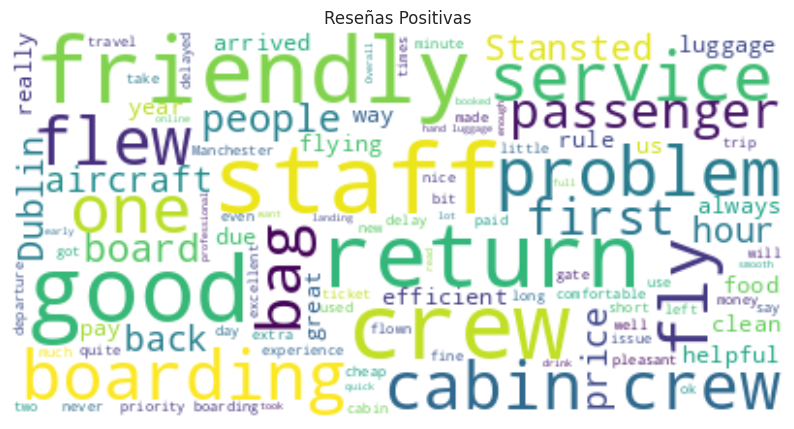

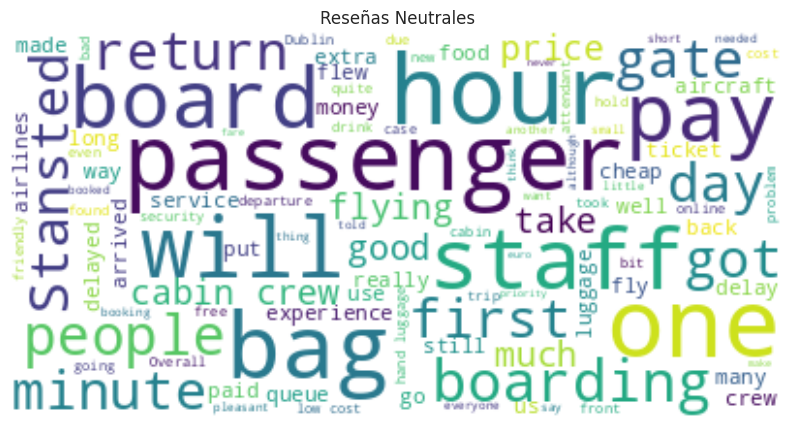

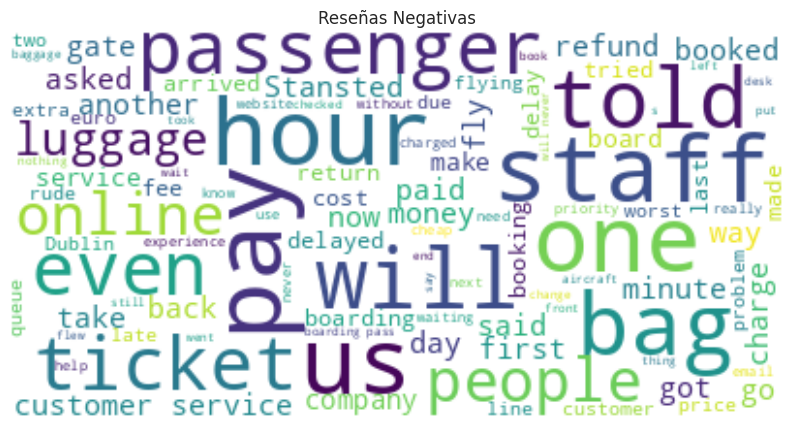

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


# Lista de palabras que quieres excluir
excluded_words = {'Ryanair', 'flight', "u", 'flights', 'airline', "airport", 'not', "and", "the", "for", "that", "check", "seat", "time", "plane", "seats"}

# Añadir las palabras excluidas al conjunto de stopwords
stopwords = set(STOPWORDS).union(excluded_words)

# Función para clasificar las reseñas
def classify_review(row):
    if row['Overall Rating'] <= 4.0:
        return 'Negativo'
    elif row['Overall Rating'] < 7.0:
        return 'Neutral'
    elif row['Overall Rating'] >= 7.0:
        return 'Positivo'
    else:
        return -1

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)

# Unir todos los comentarios positivos en una sola cadena
positive_text = " ".join(review for review in df[df['Sentiment'] == 'Positivo'].Comment.dropna())

# Generar una nube de palabras para reseñas positivas
positive_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(positive_text)

# Mostrar la imagen generada para reseñas positivas
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reseñas Positivas")
plt.show()

# Unir todos los comentarios neutrales en una sola cadena
neutral_text = " ".join(review for review in df[df['Sentiment'] == 'Neutral'].Comment.dropna())

# Generar una nube de palabras para reseñas neutrales
neutral_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(neutral_text)

# Mostrar la imagen generada para reseñas neutrales
plt.figure(figsize=(10, 7))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reseñas Neutrales")
plt.show()

# Unir todos los comentarios negativos en una sola cadena
negative_text = " ".join(review for review in df[df['Sentiment'] == 'Negativo'].Comment.dropna())

# Generar una nube de palabras para reseñas negativas
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(negative_text)

# Mostrar la imagen generada para reseñas negativas
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reseñas Negativas")
plt.show()


# Limpieza de los comentarios y eliminar los stopwords

In [24]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Mostrar las primeras filas del DataFrame modificado
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Unnamed: 0  Overall Rating Passenger Country  Trip_verified  \
0           0             1.0          Portugal  Trip Verified   
1           1             1.0            France  Trip Verified   
2           2             1.0            France  Trip Verified   
3           3             1.0            Jordan  Trip Verified   
4           4             1.0       Switzerland  Trip Verified   

                              Comment title  \
0                  "lack of responsibility"   
1                      "a classic rip off"    
2  “refused to book me onto another flight”   
3      “lost my luggage on a direct flight”   
4          "incompetent to help passengers"   

                                             Comment Type Of Traveller  \
0  It was really bad, after finding out that ther...    Family Leisure   
1  We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2  We all know Ryanair is garbage, but here is an...          Business   
3  Ryanair lost my luggage on a direct flight. I ...          Business   
4  Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   

       Seat Type                      Origin    Destination  ...  \
0  Economy Class                  Birmingham          Porto  ...   
1  Economy Class              Paris Beauvais         Poznan  ...   
2  Economy Class                     Limoges     Manchester  ...   
3  Economy Class  Charleroi (Brussels South)  Amman, Jordan  ...   
4  Economy Class                       Basel         Dublin  ...   

   Wifi & Connectivity  sentiment  year  month  day year_vuelo  month_vuelo  \
0                  NaN   Negativo  2024      4   29     2024.0          4.0   
1                  NaN   Negativo  2024      4   25     2024.0          4.0   
2                  NaN   Negativo  2024      4   22     2024.0          2.0   
3                  NaN   Negativo  2024      4    8     2024.0          4.0   
4                  NaN   Negativo  2024      4    8     2024.0          4.0   

   day_vuelo  Sentiment                                    Comment_cleaner  
0        1.0   Negativo  really bad finding queues two hours get securi...  
1        1.0   Negativo  booked ryanair flight paris beauvais poznan ap...  
2        1.0   Negativo  know ryanair garbage another example reschedul...  
3        1.0   Negativo  ryanair lost luggage direct flight still recei...  
4        1.0   Negativo  booked basel dublin baggage check basel waste ...  

[5 rows x 28 columns]

# Year vs Sentiment count¶
In this block we will see how many reviews were posted based on sentiments in each year from 2012 to 2014

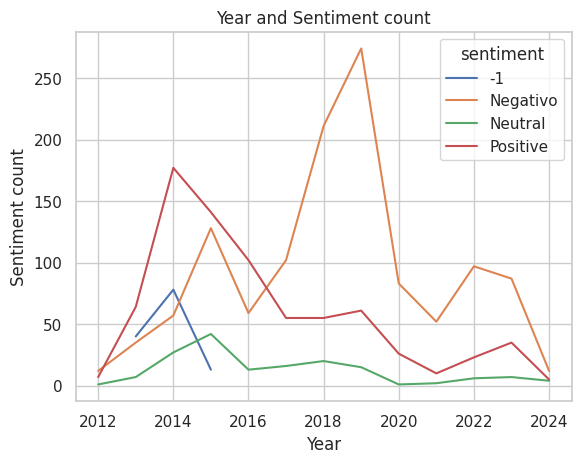

In [25]:
df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

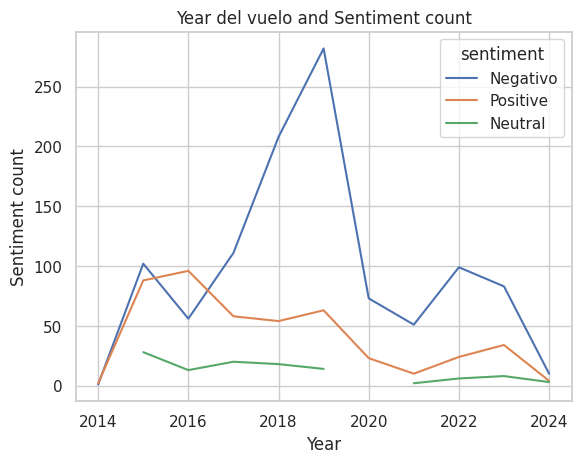

In [26]:
df.groupby(["year_vuelo",'sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year del vuelo and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

# Day of month vs Reviews count
Let's check if there are any relationship between reviews and day of month

<ipython-input-27-0b58fdeb9e19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y='Comment_cleaner', data=day, palette=palette)


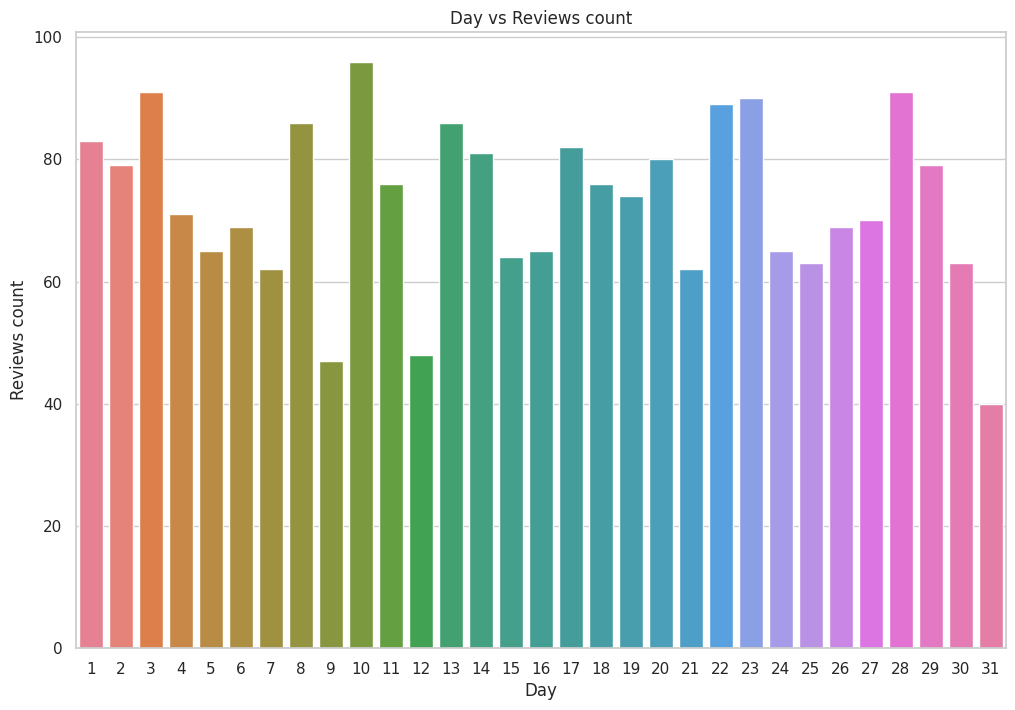

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame que agrupa los comentarios por día y cuenta el número de comentarios
day = pd.DataFrame(df.groupby('day')['Comment_cleaner'].count()).reset_index()

# Asegurarse de que la columna 'day' sea de tipo entero
day['day'] = day['day'].astype('int64')

# Ordenar los valores por día
day = day.sort_values(by=['day'])

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Plotear el gráfico de barras con diferentes colores para cada barra
palette = sns.color_palette("husl", len(day))  # Seleccionar una paleta de colores
sns.barplot(x="day", y='Comment_cleaner', data=day, palette=palette)

# Añadir títulos y etiquetas a los ejes
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()


# Estimación de la polaridad de las reseñas

In [28]:
from textblob import TextBlob

# Calcular la polaridad de las reseñas limpias
df['polarity'] = df['Comment_cleaner'].map(lambda text: TextBlob(text).sentiment.polarity)

# Calcular la longitud de las reseñas limpias
df['review_len'] = df['Comment_cleaner'].astype(str).apply(len)

# Calcular el conteo de palabras en las reseñas limpias
df['word_count'] = df['Comment_cleaner'].apply(lambda x: len(str(x).split()))


In [29]:
# Mostrar las primeras filas del DataFrame modificado
df.head()

Unnamed: 0  Overall Rating Passenger Country  Trip_verified  \
0           0             1.0          Portugal  Trip Verified   
1           1             1.0            France  Trip Verified   
2           2             1.0            France  Trip Verified   
3           3             1.0            Jordan  Trip Verified   
4           4             1.0       Switzerland  Trip Verified   

                              Comment title  \
0                  "lack of responsibility"   
1                      "a classic rip off"    
2  “refused to book me onto another flight”   
3      “lost my luggage on a direct flight”   
4          "incompetent to help passengers"   

                                             Comment Type Of Traveller  \
0  It was really bad, after finding out that ther...    Family Leisure   
1  We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2  We all know Ryanair is garbage, but here is an...          Business   
3  Ryanair lost my luggage on a direct flight. I ...          Business   
4  Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   

       Seat Type                      Origin    Destination  ...  month  day  \
0  Economy Class                  Birmingham          Porto  ...      4   29   
1  Economy Class              Paris Beauvais         Poznan  ...      4   25   
2  Economy Class                     Limoges     Manchester  ...      4   22   
3  Economy Class  Charleroi (Brussels South)  Amman, Jordan  ...      4    8   
4  Economy Class                       Basel         Dublin  ...      4    8   

  year_vuelo  month_vuelo  day_vuelo Sentiment  \
0     2024.0          4.0        1.0  Negativo   
1     2024.0          4.0        1.0  Negativo   
2     2024.0          2.0        1.0  Negativo   
3     2024.0          4.0        1.0  Negativo   
4     2024.0          4.0        1.0  Negativo   

                                     Comment_cleaner  polarity  review_len  \
0  really bad finding queues two hours get securi... -0.291667        1283   
1  booked ryanair flight paris beauvais poznan ap... -0.176667         625   
2  know ryanair garbage another example reschedul... -0.333333         293   
3  ryanair lost luggage direct flight still recei... -0.102778         702   
4  booked basel dublin baggage check basel waste ... -0.140816        1627   

  word_count  
0        204  
1         88  
2         43  
3         96  
4        240  

[5 rows x 31 columns]

# Estimacióon de polaridad

#Sentiment polarity distribution
Let's look at our polarity distribution

In [ ]:
#!pip install cufflinks plotly

In [30]:
# Instalación de las librerías necesarias (ejecutar solo si no están instaladas)


# Importar las librerías necesarias
import pandas as pd
import cufflinks as cf
from plotly.offline import init_notebook_mode
import plotly.io as pio

# Configuración de cufflinks y plotly para Google Colab
cf.go_offline()
init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

# Suponiendo que df ya tiene la columna 'polarity'
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Analisis de polaridad',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution'
)


Interpretación del Histograma de Polaridad de Sentimiento
Distribución de la Polaridad:

La mayoría de las reseñas están concentradas alrededor de la polaridad 0, que indica que muchas reseñas son neutras en términos de sentimiento.
Hay una distribución asimétrica con una ligera inclinación hacia el lado positivo (polaridad > 0). Esto sugiere que, aunque hay muchas reseñas neutras, también hay un número considerable de reseñas positivas.
Hay menos reseñas con polaridad negativa, indicando que menos usuarios expresan sentimientos muy negativos en sus comentarios.
Reseñas Extremadamente Positivas o Negativas:

La polaridad en los extremos (-1 y 1) tiene muy pocos comentarios. Esto es normal en muchos conjuntos de datos de reseñas, ya que los comentarios extremadamente positivos o negativos son menos comunes.
Análisis Adicional
Para un análisis más profundo, podríamos observar la relación entre la polaridad del sentimiento y otras variables en el conjunto de datos. Aquí te dejo algunas ideas de análisis adicionales y cómo podrías implementarlos:

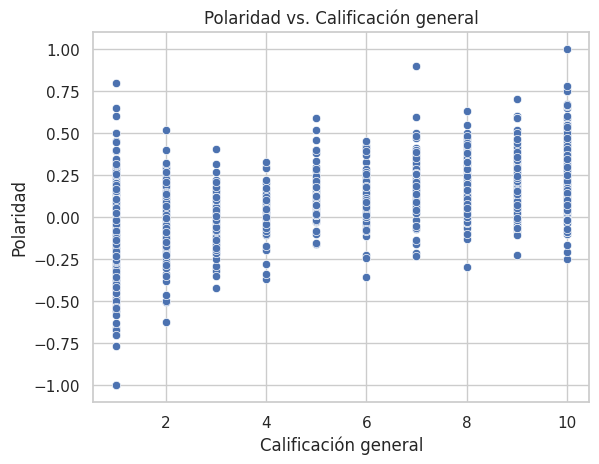

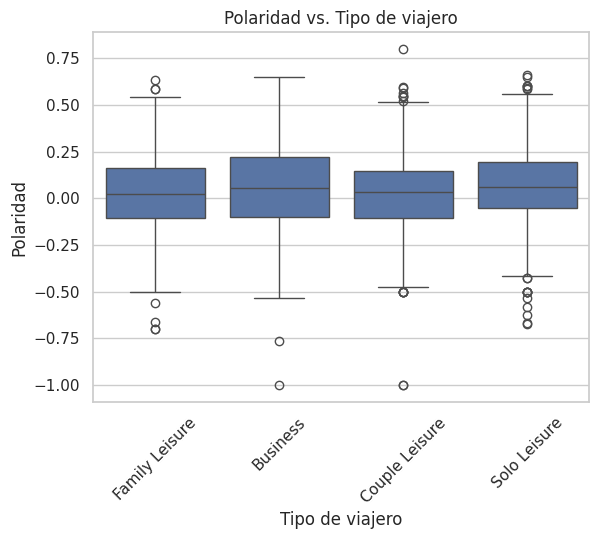

In [31]:
# Análisis de la relación entre polaridad y calificación general
sns.scatterplot(x='Overall Rating', y='polarity', data=df)
plt.title('Polaridad vs. Calificación general')
plt.xlabel('Calificación general')
plt.ylabel('Polaridad')
plt.show()

# Análisis de la relación entre polaridad y tipo de viajero
sns.boxplot(x='Type Of Traveller', y='polarity', data=df)
plt.title('Polaridad vs. Tipo de viajero')
plt.xlabel('Tipo de viajero')
plt.ylabel('Polaridad')
plt.xticks(rotation=45)
plt.show()


In [32]:
df["sentiment"].unique()

array(['Negativo', 'Neutral', 'Positive', -1], dtype=object)

# analisis entre polaridad y overall rating y sentiment analisis para decidir cual es y

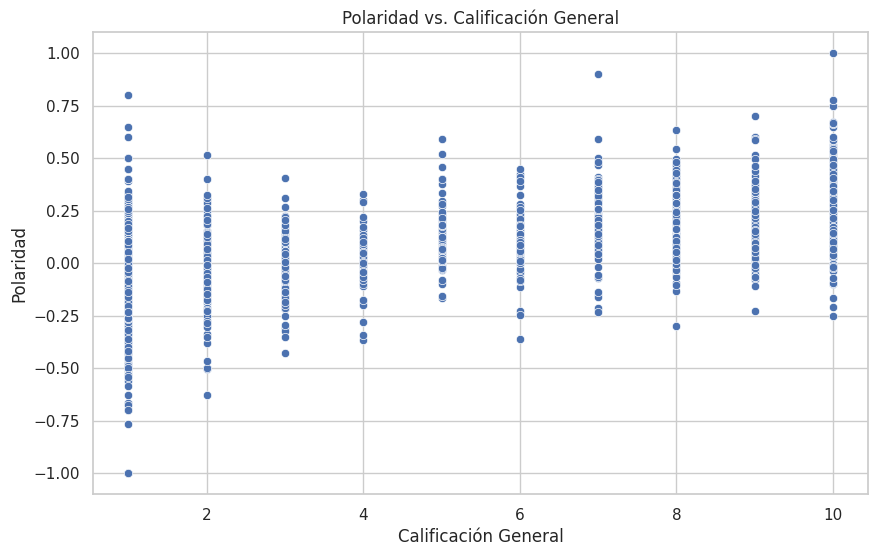

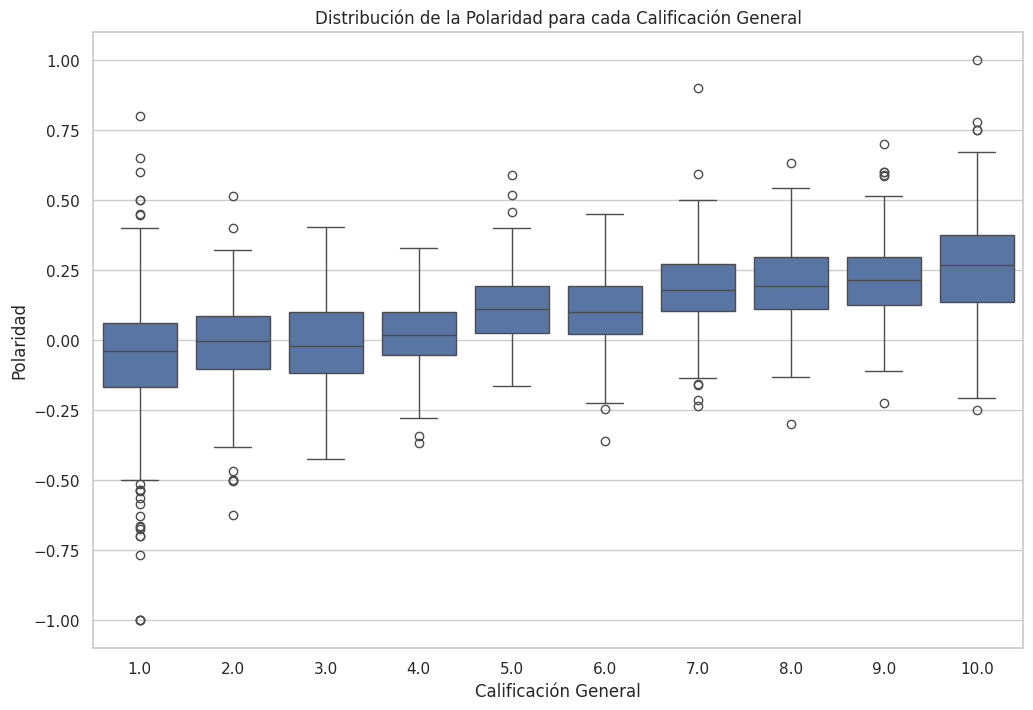

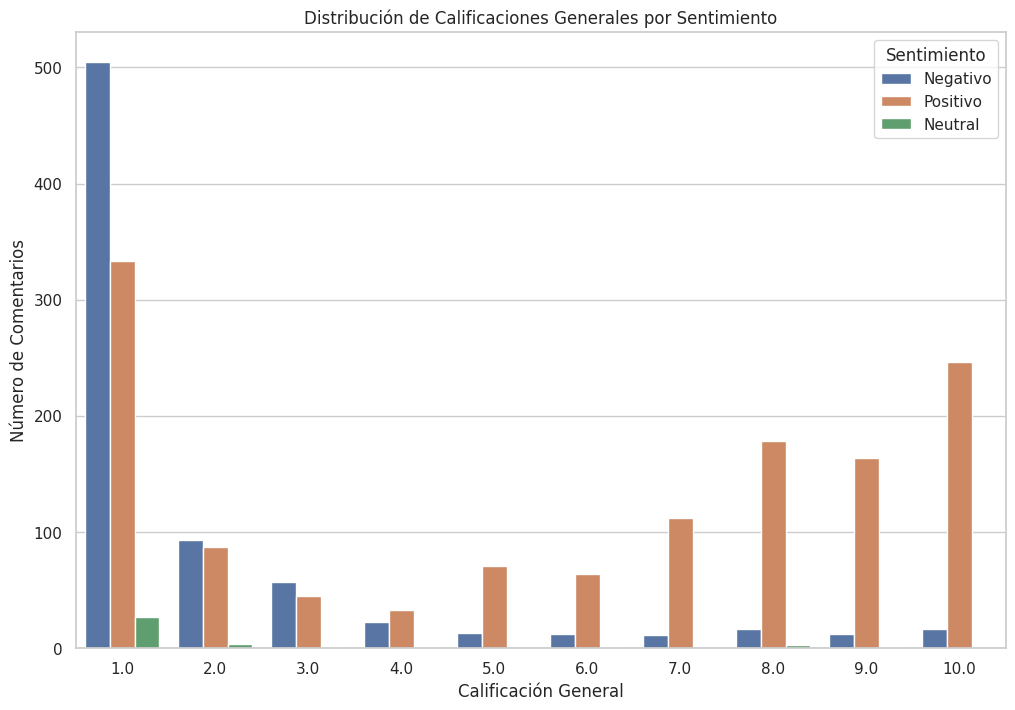

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre polaridad y calificación general
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Rating', y='polarity', data=df)
plt.title('Polaridad vs. Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Boxplot entre polaridad y calificación general
plt.figure(figsize=(12, 8))
sns.boxplot(x='Overall Rating', y='polarity', data=df)
plt.title('Distribución de la Polaridad para cada Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Función para clasificar el sentimiento basado en la polaridad
def classify_sentiment(polarity):
    if polarity < 0:
        return 'Negativo'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positivo'

# Crear una nueva columna para la clasificación del sentimiento
df['Sentiment_polarity'] = df['polarity'].apply(classify_sentiment)

# Gráfico de barras para la distribución de calificaciones generales por sentimiento
plt.figure(figsize=(12, 8))
sns.countplot(x='Overall Rating', hue='Sentiment_polarity', data=df)
plt.title('Distribución de Calificaciones Generales por Sentimiento')
plt.xlabel('Calificación General')
plt.ylabel('Número de Comentarios')
plt.legend(title='Sentimiento')
plt.show()


In [34]:
df.columns

Index(['Unnamed: 0', 'Overall Rating', 'Passenger Country', 'Trip_verified',
       'Comment title', 'Comment', 'Type Of Traveller', 'Seat Type', 'Origin',
       'Destination', 'Ground Service', 'Value For Money', 'Recommended',
       'Seat Comfort', 'Cabin Staff Service', 'Aircraft', 'Food & Beverages',
       'Inflight Entertainment', 'Wifi & Connectivity', 'sentiment', 'year',
       'month', 'day', 'year_vuelo', 'month_vuelo', 'day_vuelo', 'Sentiment',
       'Comment_cleaner', 'polarity', 'review_len', 'word_count',
       'Sentiment_polarity'],
      dtype='object')

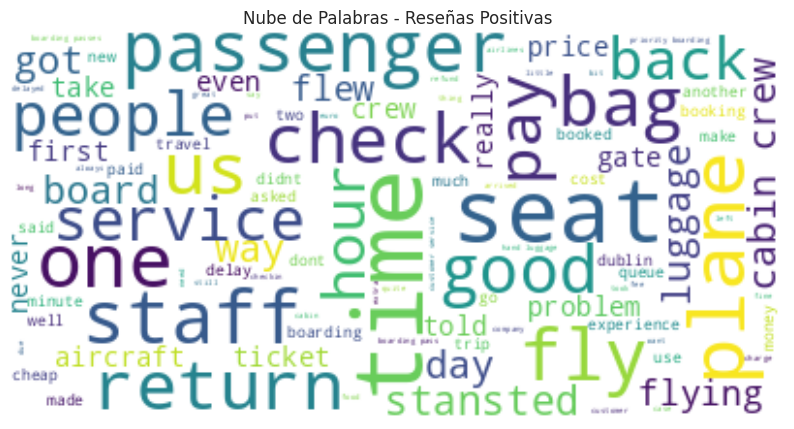

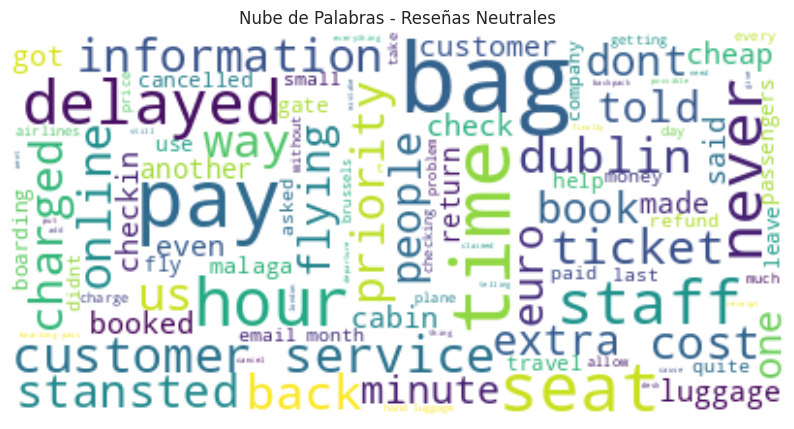

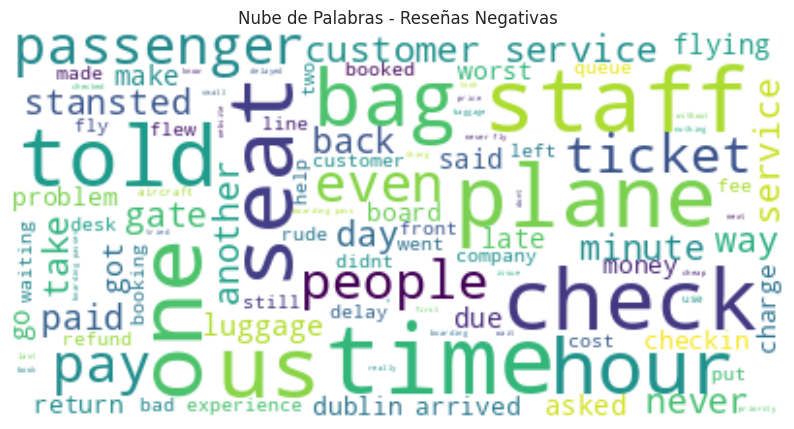

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame(df)
# Lista de palabras que quieres excluir
excluded_words = {'Ryanair', 'flight', "u", 'flights', 'airline', "airport", 'not', "and", "the", "for", "that"}

# Añadir las palabras excluidas al conjunto de stopwords
stopwords = set(STOPWORDS).union(excluded_words)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Unir todos los comentarios en una sola cadena para cada categoría de Sentiment_polarity
positive_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Positivo']['Comment_cleaner'].dropna())
neutral_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Neutral']['Comment_cleaner'].dropna())
negative_text = " ".join(review for review in data[data['Sentiment_polarity'] == 'Negativo']['Comment_cleaner'].dropna())

# Generar y mostrar la nube de palabras para cada categoría
generate_wordcloud(positive_text, "Nube de Palabras - Reseñas Positivas")
generate_wordcloud(neutral_text, "Nube de Palabras - Reseñas Neutrales")
generate_wordcloud(negative_text, "Nube de Palabras - Reseñas Negativas")


Interpretación del Gráfico de Distribución de Calificaciones Generales por Sentimiento
El gráfico de barras muestra la distribución de las calificaciones generales (de 1 a 10) segmentadas por el sentimiento (Negativo, Neutral y Positivo).

Observaciones Clave
Calificaciones Muy Bajas (1-2):

Negativo: Hay una gran cantidad de comentarios con calificación 1 que están clasificados como negativos. Esto sugiere que los pasajeros que tuvieron una experiencia muy mala suelen expresar sus sentimientos negativos claramente.
Positivo: Hay algunos comentarios clasificados como positivos en calificaciones bajas, lo cual podría indicar inconsistencias en las reseñas o aspectos específicos que fueron valorados positivamente a pesar de la mala experiencia general.
Neutral: Hay muy pocos comentarios neutros en las calificaciones más bajas.
Calificaciones Medias (3-7):

Negativo: La presencia de comentarios negativos disminuye a medida que aumenta la calificación.
Positivo: A partir de la calificación 6, comienzan a aparecer más comentarios positivos, especialmente en la calificación 7.
Neutral: Hay una presencia constante, aunque baja, de comentarios neutros.
Calificaciones Altas (8-10):

Positivo: La mayoría de los comentarios con calificaciones altas están clasificados como positivos, especialmente en las calificaciones 8, 9 y 10. Esto indica que los pasajeros que tuvieron una experiencia muy buena tienden a expresar sentimientos positivos.
Negativo: Hay una pequeña cantidad de comentarios negativos incluso en las calificaciones más altas, lo cual podría deberse a aspectos específicos que no fueron del agrado del pasajero.
Neutral: Hay muy pocos comentarios neutros en las calificaciones más altas.

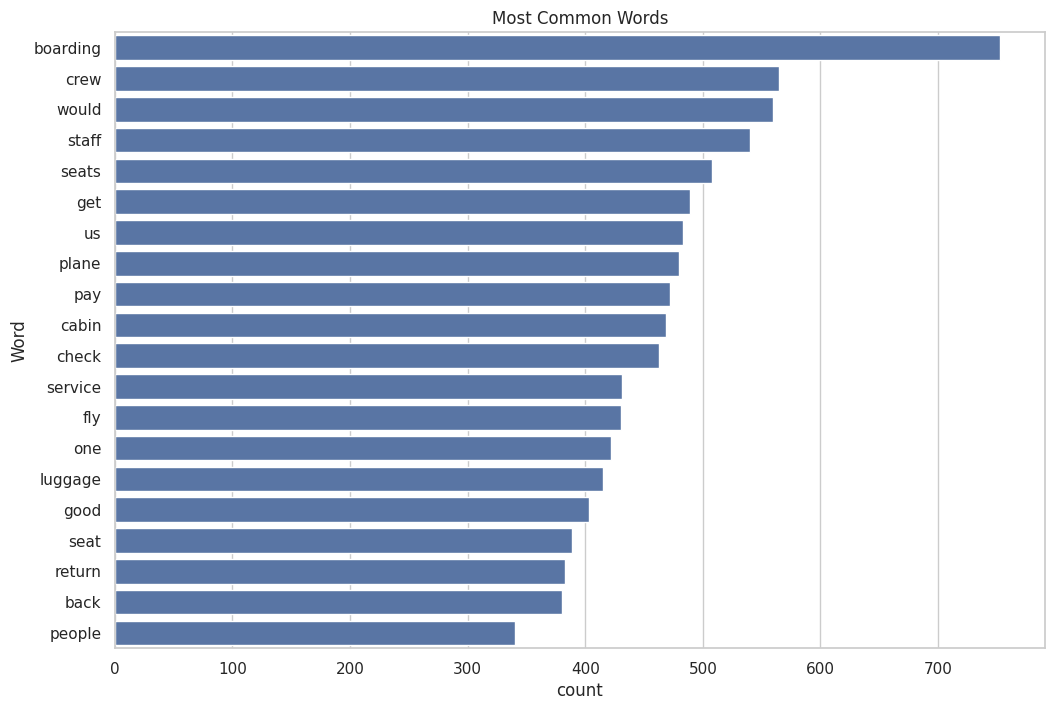

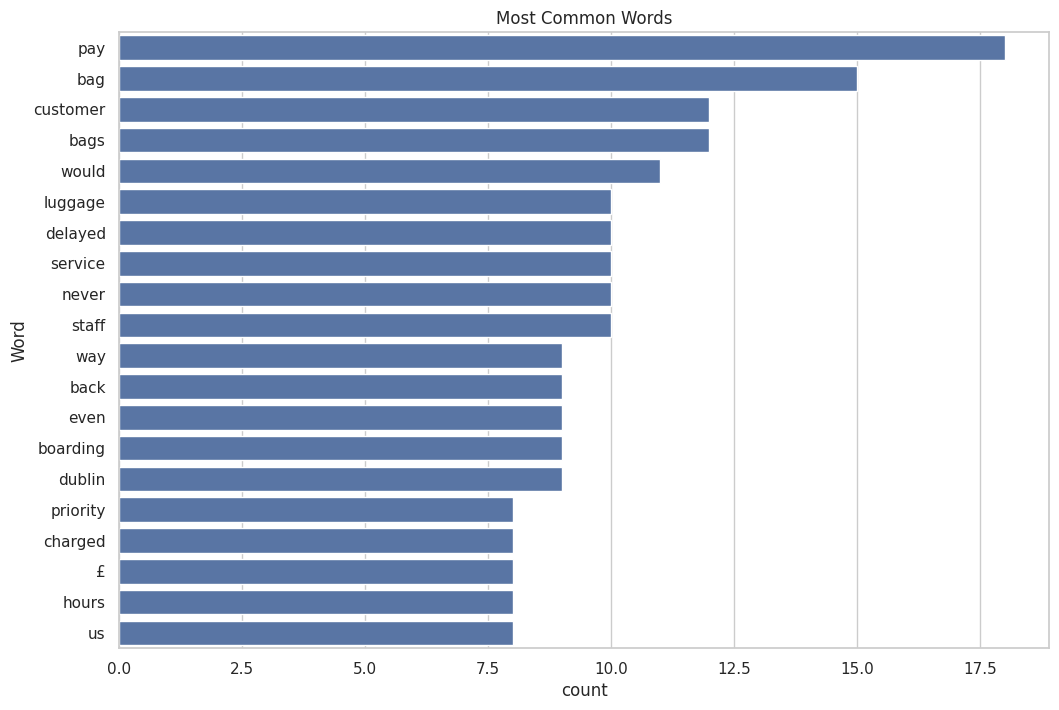

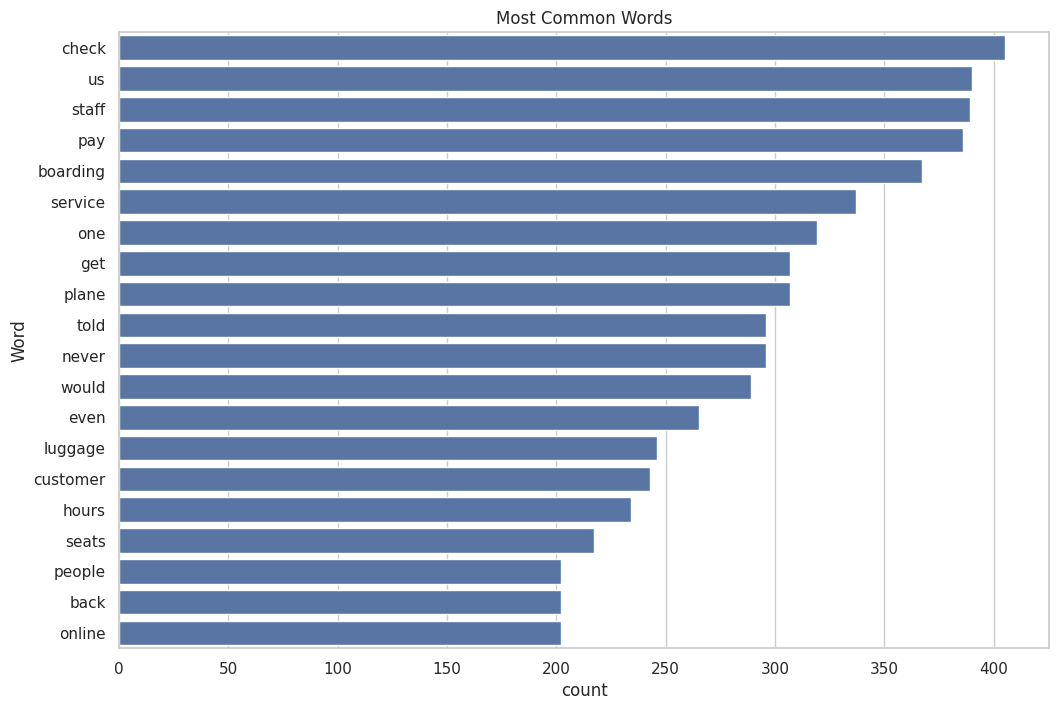

In [36]:
# Lista de palabras que deseas excluir
excluded_words = {'this', 'is', 'and', 'i', "time", 'Ryanair', "ryanair", 'flight', "u", 'flights',
                  'airline', "airport", 'not', "and", "the", "for", "that"}

# Función para limpiar el texto
def clean_text(text, excluded_words):
    return ' '.join([word for word in text.split() if word.lower() not in excluded_words])

# Aplicar la función de limpieza al DataFrame
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: clean_text(x, excluded_words))

# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Sentiment_polarity'] == 'Positivo']['Comment_cleaner']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas neutrales
neutral_reviews = df[df['Sentiment_polarity'] == 'Neutral']['Comment_cleaner']
plot_most_common_words(neutral_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Sentiment_polarity'] == 'Negativo']['Comment_cleaner']
plot_most_common_words(negative_reviews)

Sentiment_polarity
Positivo    1397
Negativo     822
Neutral       43
Name: count, dtype: int64


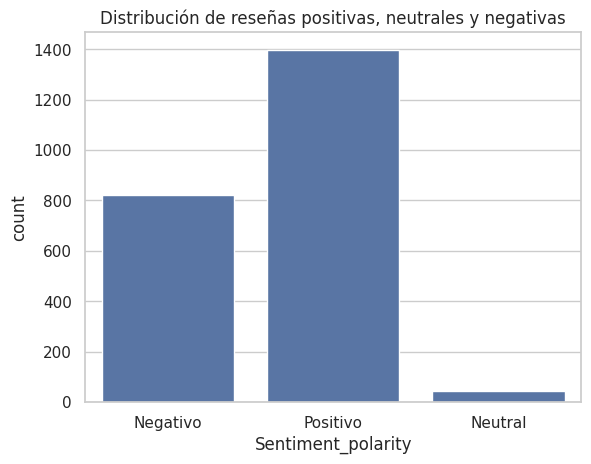

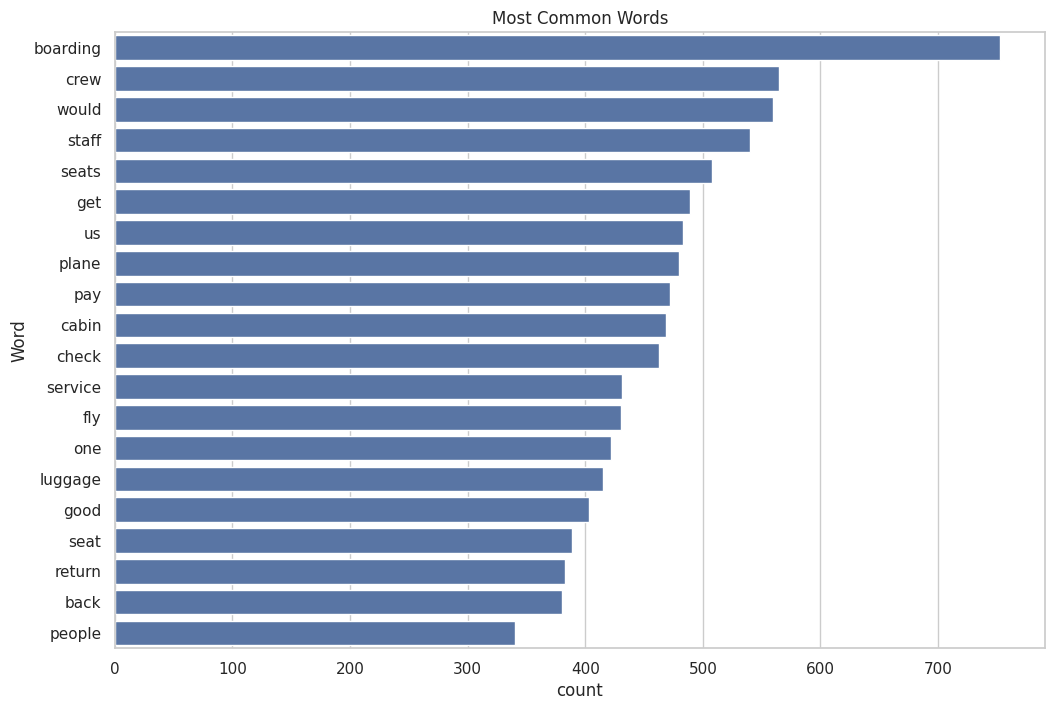

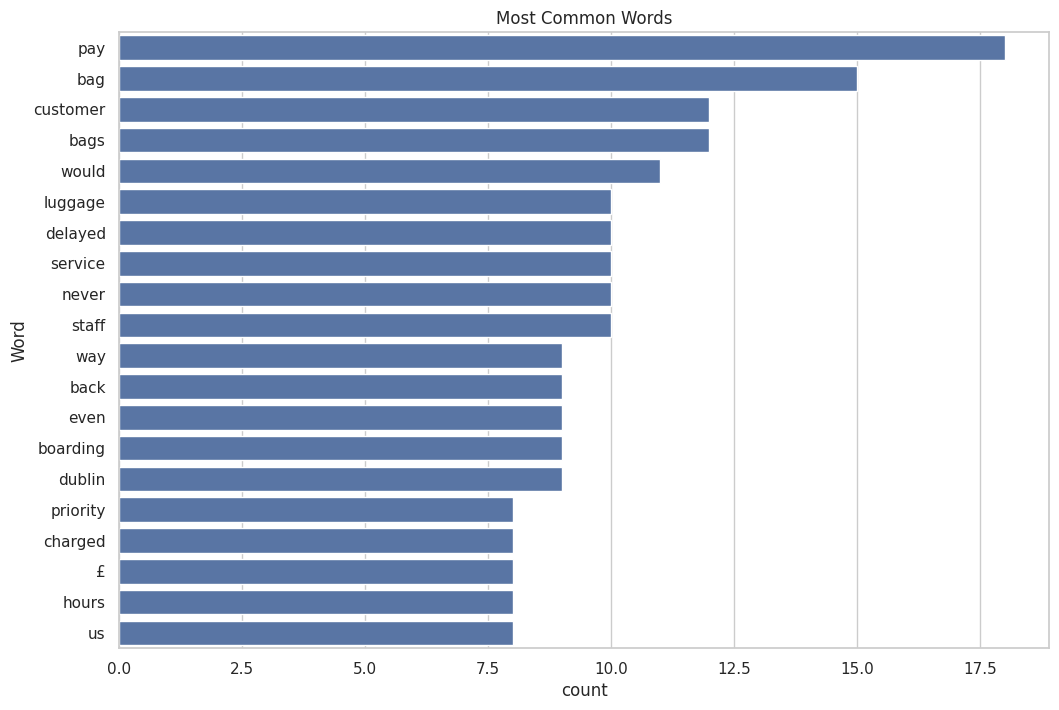

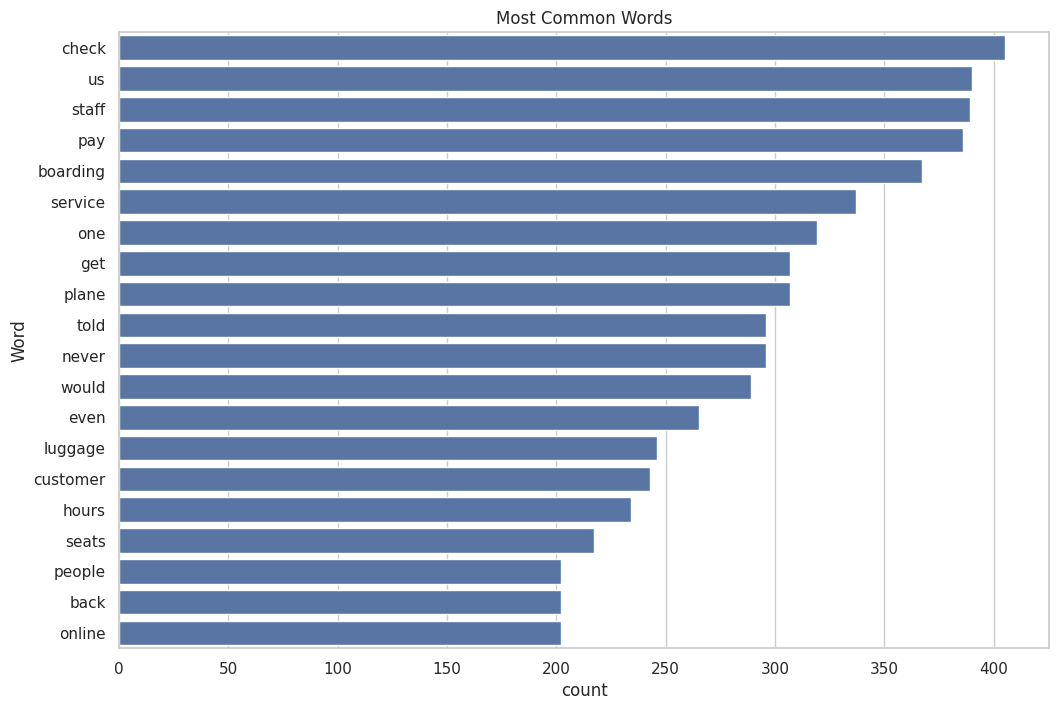

In [37]:
# Conteo de valores para ver el balance de clases
print(df['Sentiment_polarity'].value_counts())

# Gráfico de barras para mostrar la distribución de reseñas positivas y negativas
sns.countplot(x='Sentiment_polarity', data=df)
plt.title('Distribución de reseñas positivas, neutrales y negativas')
plt.show()


# Función para graficar las palabras más frecuentes
def plot_most_common_words(text, n=20):
    words = ' '.join(text).split()  # Asegúrate de que 'text' no está vacío
    freq_dist = nltk.FreqDist(words)
    words_df = pd.DataFrame({'word': list(freq_dist.keys()), 'count': list(freq_dist.values())})
    d = words_df.nlargest(columns='count', n=n)  # Selecciona las n palabras más frecuentes
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel='Word')
    plt.title('Most Common Words')
    plt.show()

# Visualización de palabras más comunes en reseñas positivas
positive_reviews = df[df['Sentiment_polarity']== 'Positivo']['Comment_cleaner']
plot_most_common_words(positive_reviews)

# Visualización de palabras más comunes en reseñas negativas
neutrals_reviews = df[df['Sentiment_polarity']== 'Neutral']['Comment_cleaner']
plot_most_common_words(neutrals_reviews)

# Visualización de palabras más comunes en reseñas negativas
negative_reviews = df[df['Sentiment_polarity']== 'Negativo']['Comment_cleaner']
plot_most_common_words(negative_reviews)

# VOLVER A EJECUTAR LUEGO DEL TEXT CLEANING

#Análisis de Bigrama

In [39]:
from collections import defaultdict
from nltk import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# Configurar Plotly para trabajar en Google Colab
pyo.init_notebook_mode(connected=True)

# Función para generar bigramas
def generate_ngrams(text, n):
    words = text.split()
    return [' '.join(gram) for gram in ngrams(words, n)]

# Función para crear gráficos de barras horizontales
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df['word'],
        x=df['wordcount'],
        orientation='h',
        marker=dict(
            color=color,
        )
    )
    return trace

# Filtrar las reseñas por sentimiento
review_pos = df[df['Sentiment_polarity'] == 'Positivo']
review_neu = df[df['Sentiment_polarity'] == 'Neutral']
review_neg = df[df['Sentiment_polarity'] == 'Negativo']

# Gráfico de bigramas para reseñas positivas
freq_dict = defaultdict(int)
for sent in review_pos["Comment_cleaner"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Gráfico de bigramas para reseñas neutras
freq_dict = defaultdict(int)
for sent in review_neu["Comment_cleaner"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

# Gráfico de bigramas para reseñas negativas
freq_dict = defaultdict(int)
for sent in review_neg["Comment_cleaner"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

# Crear subplots
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                    subplot_titles=["Bigram plots of Positive reviews",
                                    "Bigram plots of Neutral reviews",
                                    "Bigram plots of Negative reviews"])

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=2, col=1)
fig.add_trace(trace2, row=3, col=1)

fig.update_layout(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")

In [ ]:
#pip install -U kaleido

In [40]:
# Guardar el gráfico como un archivo HTML
fig.write_html("bigrams.html")

# Mostrar el archivo HTML en Google Colab
from IPython.display import display, HTML

display(HTML("bigrams.html"))




# Analysis Trigram Plot

In [41]:
import pandas as pd
from collections import defaultdict
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython.display import display, HTML

def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df['word'],
        x=df['wordcount'],
        orientation='h',
        marker=dict(color=color),
    )
    return trace

# Supongamos que tienes los DataFrames review_pos, review_neu, review_neg ya cargados
# review_pos = pd.DataFrame({'reviews': [...]})
# review_neu = pd.DataFrame({'reviews': [...]})
# review_neg = pd.DataFrame({'reviews': [...]})

# Obtener el gráfico de barras de reviews positivas
freq_dict = defaultdict(int)
for sent in review_pos["Comment_cleaner"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Obtener el gráfico de barras de reviews neutras
freq_dict = defaultdict(int)
for sent in review_neu["Comment_cleaner"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Obtener el gráfico de barras de reviews negativas
freq_dict = defaultdict(int)
for sent in review_neg["Comment_cleaner"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Crear los subplots
fig = make_subplots(rows=3, cols=1, vertical_spacing=0.04, subplot_titles=[
    "Tri-gram plots of Positive reviews",
    "Tri-gram plots of Neutral reviews",
    "Tri-gram plots of Negative reviews"
])

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=2, col=1)
fig.add_trace(trace2, row=3, col=1)

fig.update_layout(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")

# Mostrar el gráfico en Google Colab
fig.show()

# Mostrar los DataFrames como tablas HTML en Google Colab
display(HTML('<h2>Top 25 Trigrams in Positive Reviews</h2>'))
display(HTML(fd_sorted_pos.head(25).to_html(index=False)))

display(HTML('<h2>Top 25 Trigrams in Neutral Reviews</h2>'))
display(HTML(fd_sorted_neu.head(25).to_html(index=False)))

display(HTML('<h2>Top 25 Trigrams in Negative Reviews</h2>'))
display(HTML(fd_sorted_neg.head(25).to_html(index=False)))


#Extracting Features from Cleaned reviews
Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con una columna 'Sentiment_polarity'

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar las etiquetas en la columna 'Sentiment_polarity'
df['Sentiment_polarity'] = label_encoder.fit_transform(df['Sentiment_polarity'])

# Mostrar los valores únicos codificados
print(df['Sentiment_polarity'].unique())


[0 2 1]


In [43]:
df['Sentiment_polarity'].value_counts()

Sentiment_polarity
2    1397
0     822
1      43
Name: count, dtype: int64

#Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

Going->go
Finally->fina
If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [44]:
#Extracting 'reviews' for processing
review_features=df.copy()
review_features['clean_review']= review_features[['Comment_cleaner']].reset_index(drop=True)

In [45]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['clean_review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
corpus[3]

'lost luggag direct still receiv inform fr charleroi amman april left approxim minut late final crew inform plane heavi henc delay solut found upon arriv luggag arriv solut remov luggag least dozen passeng look like never know fail meet reason expect checkedin luggag direct arriv passeng well awar least dozen passeng victim utter incompet file report amman fill eform tri chatbot useless chat someon fb messeng wast spoke phone ra custom servic person belgium end hang call three day later neither amman receiv inform miss luggag'

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF

TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['clean_review'])

In [48]:
X.shape

(2262, 5000)

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [49]:
review_features.columns

Index(['Unnamed: 0', 'Overall Rating', 'Passenger Country', 'Trip_verified',
       'Comment title', 'Comment', 'Type Of Traveller', 'Seat Type', 'Origin',
       'Destination', 'Ground Service', 'Value For Money', 'Recommended',
       'Seat Comfort', 'Cabin Staff Service', 'Aircraft', 'Food & Beverages',
       'Inflight Entertainment', 'Wifi & Connectivity', 'sentiment', 'year',
       'month', 'day', 'year_vuelo', 'month_vuelo', 'day_vuelo', 'Sentiment',
       'Comment_cleaner', 'polarity', 'review_len', 'word_count',
       'Sentiment_polarity', 'clean_review'],
      dtype='object')

In [50]:
#Getting the target variable(encoded)
y= df['Sentiment_polarity']

# Handling Imbalance target feature-SMOTE
In our target feature, we noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situatio. Here I use SMOTE(Synthetic Minority Oversampling Technique) to balance out the imbalanced dataset problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [51]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 1397, 0: 822, 1: 43})
Resampled dataset shape Counter({0: 1397, 2: 1397, 1: 1397})


Great, as you can see the resampled data has equally distributed classes

# Train-test split(75:25)
Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.

In [52]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# Model Building: Sentiment Analysis
As we have successfully processed the text data, not it is just a normal machine learning problem. Where from the sparse matrix we predict the classes in target feature.

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model selection¶
First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [54]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification


# Crear los objetos de los clasificadores
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier()
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()

# Diccionario de nombres de los clasificadores
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'SVC', 4: 'Naive Bayes'}
# Lista de modelos
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv]

# Realizar validación cruzada y mostrar la precisión promedio
for i, model in enumerate(cv_models):
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print("{} Test Accuracy: {:.2f}".format(cv_dict[i], accuracy))


Logistic Regression Test Accuracy: 0.70
Decision Tree Test Accuracy: 0.62
KNN Test Accuracy: 0.63
SVC Test Accuracy: 0.68
Naive Bayes Test Accuracy: 0.68


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 70%. That's great. So let's go with logistic regression with hyperparameter tuning.

Logistic Regression with Hyperparameter tuning
We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

LogisticRegression(C=1.2067926406393288, random_state=0)
The mean accuracy of the model is: 0.8540076335877863


**From the selected params, we get accuracy. Let's plug and chug**

In [57]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#Classification metrics¶
Here we plot the confusion matrix with ROC and check our f1 score

Confusion matrix, without normalization


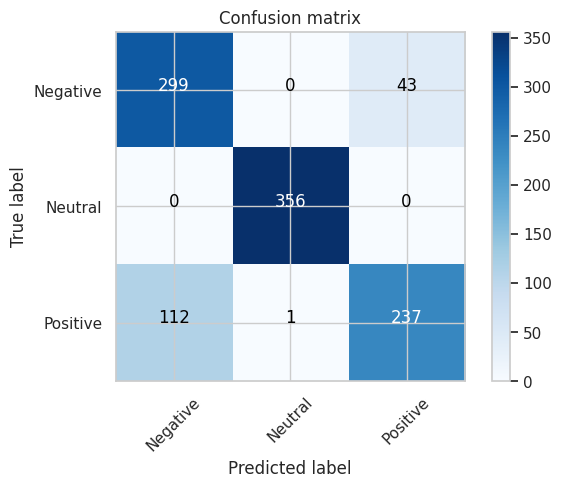

In [58]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

True Negative (TN): 302 instancias fueron correctamente clasificadas como negativas.
False Negative (FN): 118 instancias positivas fueron incorrectamente clasificadas como negativas.
False Positive (FP): 40 instancias negativas fueron incorrectamente clasificadas como positivas.
True Neutral: 356 instancias fueron correctamente clasificadas como neutrales.
False Neutral: No hay instancias neutrales clasificadas incorrectamente.
True Positive (TP): 232 instancias fueron correctamente clasificadas como positivas.

In [59]:
from sklearn.metrics import classification_report

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print(report)


              precision    recall  f1-score   support

    Negative       0.73      0.87      0.79       342
     Neutral       1.00      1.00      1.00       356
    Positive       0.85      0.68      0.75       350

    accuracy                           0.85      1048
   macro avg       0.86      0.85      0.85      1048
weighted avg       0.86      0.85      0.85      1048



Since predicting both positive,negative and neutral reviews are important we are considering.We got a pretty good f1 score. As we see it got a good score across all classes classified

# ROC-AUC curve
This is a very important curve where we decide on which threshold to setup based upon the objective criteria. Here we plotted ROC for different classes which can help us understand which class was classified better. Also we plot micro and macro averages on the roc curve.

<ipython-input-60-874d3eddae2c>:43: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



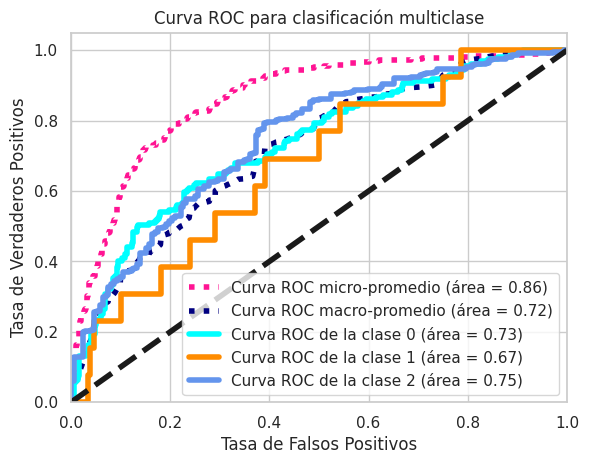

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

# Suponiendo que ya tienes X e y definidos en tu entorno
# y debe contener las clases [0, 1, 2]

# Binarizar las etiquetas
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=0)

# Entrenar un clasificador OneVsRest
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcular TPR y FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC y el área bajo la curva (AUC) micro-promediadas
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Agregar todas las tasas de falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolar todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente promediar y calcular el AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar todas las curvas ROC
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Curva ROC micro-promedio (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Curva ROC macro-promedio (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='Curva ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()


Interpretación del Gráfico ROC Multiclase
El gráfico ROC (Receiver Operating Characteristic) presentado es una visualización comúnmente utilizada para evaluar el rendimiento de un clasificador en problemas de clasificación binaria y multiclase. Aquí te dejo una interpretación detallada del gráfico que has generado:

Curva ROC Micro-Promedio (Micro-Average ROC Curve)

Descripción: La curva micro-promedio es una agregación de las curvas ROC de todas las clases, tratándolas como si fueran una sola curva ROC.
Área Bajo la Curva (AUC): 0.86
Interpretación: El AUC de 0.86 indica que el modelo tiene un buen rendimiento general al distinguir entre todas las clases. Un valor de AUC cercano a 1 representa un rendimiento excelente, mientras que un valor cercano a 0.5 indica un rendimiento no mejor que el azar.
Curva ROC Macro-Promedio (Macro-Average ROC Curve)

Descripción: La curva macro-promedio es el promedio de las curvas ROC de todas las clases, sin considerar la frecuencia de las clases.
Área Bajo la Curva (AUC): 0.71
Interpretación: El AUC de 0.71 sugiere que, en promedio, el rendimiento del modelo es moderado. La curva macro-promedio pondera todas las clases por igual y es útil para entender el rendimiento general cuando se tienen clases desbalanceadas.
Curvas ROC por Clase

Clase 0 (Color Aqua)
AUC: 0.73
Interpretación: La clase 0 tiene un AUC de 0.73, lo que indica un buen rendimiento del modelo para esta clase específica.
Clase 1 (Color Darkorange)
AUC: 0.63
Interpretación: La clase 1 tiene un AUC de 0.63, lo que sugiere un rendimiento menor comparado con las otras clases. El modelo tiene más dificultades para distinguir correctamente esta clase.
Clase 2 (Color Cornflowerblue)
AUC: 0.74
Interpretación: La clase 2 tiene un AUC de 0.74, lo que indica un buen rendimiento del modelo para esta clase específica.
Observaciones Generales:
Ejes del Gráfico:

Eje X (Tasa de Falsos Positivos): Representa la proporción de instancias negativas que fueron clasificadas incorrectamente como positivas.
Eje Y (Tasa de Verdaderos Positivos): Representa la proporción de instancias positivas que fueron clasificadas correctamente.
Curva Diagonal (Línea Negra): Representa un clasificador aleatorio (AUC = 0.5). Las curvas ROC por encima de esta línea indican un rendimiento mejor que el azar.

Rendimiento Relativo de las Clases: El modelo tiene un rendimiento desigual entre las clases. Las clases 0 y 2 tienen un rendimiento relativamente bueno, mientras que la clase 1 muestra un rendimiento inferior.

Conclusión:
El modelo tiene un buen rendimiento general (micro-promedio AUC = 0.86), pero presenta desafíos específicos con la clase 1, que tiene un AUC más bajo (0.63). Esto podría indicar la necesidad de mejorar la representación o la separación de esta clase en el conjunto de datos, posiblemente mediante técnicas de recolección de datos adicionales, balanceo de clases, o ajuste de hiperparámetros del modelo.

Siguientes Pasos:
Revisar las características: Asegurarse de que las características utilizadas son adecuadas para distinguir entre las clases.
Balancear las clases: Considerar técnicas adicionales de balanceo de clases para mejorar el rendimiento en la clase 1.
Ajuste de Hiperparámetros: Realizar una búsqueda de hiperparámetros más exhaustiva para optimizar el rendimiento del modelo.
Ingeniería de Características: Explorar nuevas características que puedan mejorar la separación entre las clases.

# The end

# Data

In [2]:
import os
import pandas as pd

# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# List the contents of the current directory
print("Directory contents:")
!ls

# Specify the full path to the file
file_path = "/content/drive/MyDrive/Colab Notebooks/M1000IA - 2024/ryanair_reviews.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
print(df)

df

Current working directory: /content
Directory contents:
drive  sample_data
      Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United Kingdom   
2260        2260     2012-08-28             1.0         Australia   
2261        2261     2012-08-23             2.0    United Kingdom   

      Trip_verified                             Comment title  \
0     Trip Verified            

Unnamed: 0 Date Published  Overall Rating Passenger Country  \
0              0     2024-04-29             1.0          Portugal   
1              1     2024-04-25             1.0            France   
2              2     2024-04-22             1.0            France   
3              3     2024-04-08             1.0            Jordan   
4              4     2024-04-08             1.0       Switzerland   
...          ...            ...             ...               ...   
2257        2257     2012-08-28             2.0    United Kingdom   
2258        2258     2012-08-28             1.0    United Kingdom   
2259        2259     2012-08-28             1.0    United Kingdom   
2260        2260     2012-08-28             1.0         Australia   
2261        2261     2012-08-23             2.0    United Kingdom   

      Trip_verified                             Comment title  \
0     Trip Verified                  "lack of responsibility"   
1     Trip Verified                      "a classic rip off"    
2     Trip Verified  “refused to book me onto another flight”   
3     Trip Verified      “lost my luggage on a direct flight”   
4     Trip Verified          "incompetent to help passengers"   
...             ...                                       ...   
2257            NaN                   Ryanair customer review   
2258            NaN                   Ryanair customer review   
2259            NaN                   Ryanair customer review   
2260            NaN                   Ryanair customer review   
2261            NaN                   Ryanair customer review   

                                                Comment Type Of Traveller  \
0     It was really bad, after finding out that ther...    Family Leisure   
1     We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2     We all know Ryanair is garbage, but here is an...          Business   
3     Ryanair lost my luggage on a direct flight. I ...          Business   
4     Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   
...                                                 ...               ...   
2257  Myself and my daughter took a holiday to Kos. ...               NaN   
2258  Stansted to Pula. Tried to adhere to all rules...               NaN   
2259  When printing the boarding tickets we got our ...               NaN   
2260  Budapest - Manchester and back again with a 5 ...               NaN   
2261  Stansted to Barcelona. Fine going there. Horre...               NaN   

          Seat Type                      Origin  ...     Date Flown  \
0     Economy Class                  Birmingham  ...     April 2024   
1     Economy Class              Paris Beauvais  ...     April 2024   
2     Economy Class                     Limoges  ...  February 2024   
3     Economy Class  Charleroi (Brussels South)  ...     April 2024   
4     Economy Class                       Basel  ...     April 2024   
...             ...                         ...  ...            ...   
2257  Economy Class                         NaN  ...            NaN   
2258  Economy Class                         NaN  ...            NaN   
2259  Economy Class                         NaN  ...            NaN   
2260  Economy Class                         NaN  ...            NaN   
2261  Economy Class                         NaN  ...            NaN   

     Ground Service  Value For Money  Recommended Seat Comfort  \
0               1.0              1.0           no          NaN   
1               1.0              1.0           no          1.0   
2               3.0              3.0           no          3.0   
3               1.0              1.0           no          2.0   
4               1.0              1.0           no          1.0   
...             ...              ...          ...          ...   
2257            NaN              1.0           no          1.0   
2258            NaN              1.0           no          3.0   
2259            NaN     

# BERT

Arregle cosas de limpieza de datos, polaridad, cleaning, etc. para tener las mismas variables que usamos antes. Y estoy finetuneando el modelo de a poco. La idea quizas es que sean dos entreadas o labels, positive y negative segun sentiment_polarity.

** A y B **

**A. Terminar de correr la version 4.** Llega hasta la parte de entrenar y se queda un rato entrenando en history. Despues se cuelga el gpu/ramy dice "Tu sesión ha fallado porque se ha usado toda la memoria RAM disponible"

**B. Fine tuning **

--arreglar los num_labels y lo que sea necesario para ajustar el modelo a este dataset y a esta tarea de  clasificacion en particular. Despues de ajustar los numlabels o las capas estaria bueno probaar en el preprocesamiento de ver si las neutras negativas se pueden poner junto con las negativas en una nueva variable "NegativasTotales" o algo asi y entrenar el modelo con negativas reales que tienen que ver con el sentiment analysis de las palabras, similar al que se hizo en sentimient_polarity en lugar de las neutras originales que estan clasificadas por puntuacion "tibia"/"sutil"/"polite" de kas personas en lugar del contenido negaivo de la resenia.


**--- Lo que hay que hacer primero: **
(Si logramos que la version 4 corra. Despues se hace la evaluacion y la generacion de ,etricas y ya se puede hacer el fine tuning del modelo. Ver como ajustar las etiquetas de las capas para que esten ok.

El código para suprimir la advertencia y proceder con el entrenamiento del modelo. Una vez que haya entrenado y evaluado el modelo, puedo abordar el problema de las etiquetas de clasificación si es necesario.

Si las etiquetas de clasificación en el conjunto de datos son diferentes de las etiquetas utilizadas en el modelo preentrenado (en este caso, 2 etiquetas para clasificación binaria), es necesario ajustar la capa de clasificación del modelo para que coincida con el número correcto de etiquetas en tu conjunto de datos. Por ejemplo, si tengo más de dos clases en mi conjunto de datos, tendrías que ajustar la capa de clasificación para tener el número adecuado de neuronas de salida.

Una vez ajustada la capa de clasificación, se puede volver a entrenar el modelo para adaptarlo a tus datos específicos. Este proceso se denomina ajuste fino (fine-tuning) y es comúnmente utilizado para mejorar el rendimiento de los modelos preentrenados en tareas específicas.)

### VERSION 4

###OPCION 1

### Limpieza y preparacion de los datos

In [3]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [ ]:
#Polarity y sentiment_polarity

####en caso de necesitar vectores / numeros

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con una columna 'Sentiment_polarity'

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar las etiquetas en la columna 'Sentiment_polarity'
df['Sentiment_polarity'] = label_encoder.fit_transform(df['Sentiment_polarity'])

# Mostrar los valores únicos codificados
print(df['Sentiment_polarity'].unique())

KeyError: 'Sentiment_polarity'

#### Comment cleaner (limpieza de comentarios)

In [4]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Mostrar las primeras filas del DataFrame modificado
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Unnamed: 0 Date Published  Overall Rating Passenger Country  Trip_verified  \
0           0     2024-04-29             1.0          Portugal  Trip Verified   
1           1     2024-04-25             1.0            France  Trip Verified   
2           2     2024-04-22             1.0            France  Trip Verified   
3           3     2024-04-08             1.0            Jordan  Trip Verified   
4           4     2024-04-08             1.0       Switzerland  Trip Verified   

                              Comment title  \
0                  "lack of responsibility"   
1                      "a classic rip off"    
2  “refused to book me onto another flight”   
3      “lost my luggage on a direct flight”   
4          "incompetent to help passengers"   

                                             Comment Type Of Traveller  \
0  It was really bad, after finding out that ther...    Family Leisure   
1  We booked a Ryanair flight from Paris Beauvais...    Family Leisure   
2  We all know Ryanair is garbage, but here is an...          Business   
3  Ryanair lost my luggage on a direct flight. I ...          Business   
4  Booked Basel to Dublin 11.10 6.4.24. Baggage C...    Family Leisure   

       Seat Type                      Origin  ... Ground Service  \
0  Economy Class                  Birmingham  ...            1.0   
1  Economy Class              Paris Beauvais  ...            1.0   
2  Economy Class                     Limoges  ...            3.0   
3  Economy Class  Charleroi (Brussels South)  ...            1.0   
4  Economy Class                       Basel  ...            1.0   

  Value For Money  Recommended  Seat Comfort Cabin Staff Service  Aircraft  \
0             1.0           no           NaN                 NaN       NaN   
1             1.0           no           1.0                 1.0       NaN   
2             3.0           no           3.0                 3.0       NaN   
3             1.0           no           2.0                 1.0       NaN   
4             1.0           no           1.0                 1.0       NaN   

   Food & Beverages Inflight Entertainment  Wifi & Connectivity  \
0               NaN                    NaN                  NaN   
1               NaN                    NaN                  NaN   
2               NaN                    NaN                  NaN   
3               NaN                    NaN                  NaN   
4               NaN                    NaN                  NaN   

                                     Comment_cleaner  
0  really bad finding queues two hours get securi...  
1  booked ryanair flight paris beauvais poznan ap...  
2  know ryanair garbage another example reschedul...  
3  ryanair lost luggage direct flight still recei...  
4  booked basel dublin baggage check basel waste ...  

[5 rows x 22 columns]

#### Polaridad

In [5]:
from textblob import TextBlob

# Calcular la polaridad de las reseñas limpias
df['polarity'] = df['Comment_cleaner'].map(lambda text: TextBlob(text).sentiment.polarity)

# Calcular la longitud de las reseñas limpias
df['review_len'] = df['Comment_cleaner'].astype(str).apply(len)

# Calcular el conteo de palabras en las reseñas limpias
df['word_count'] = df['Comment_cleaner'].apply(lambda x: len(str(x).split()))


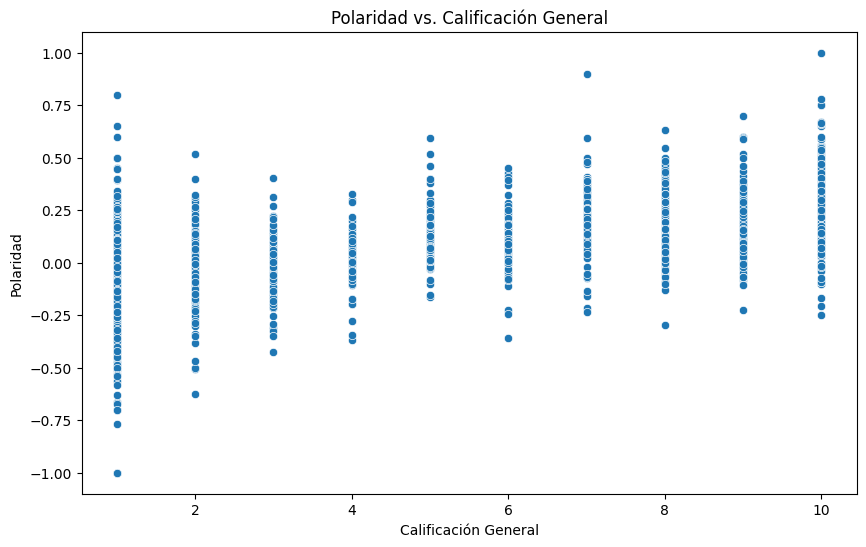

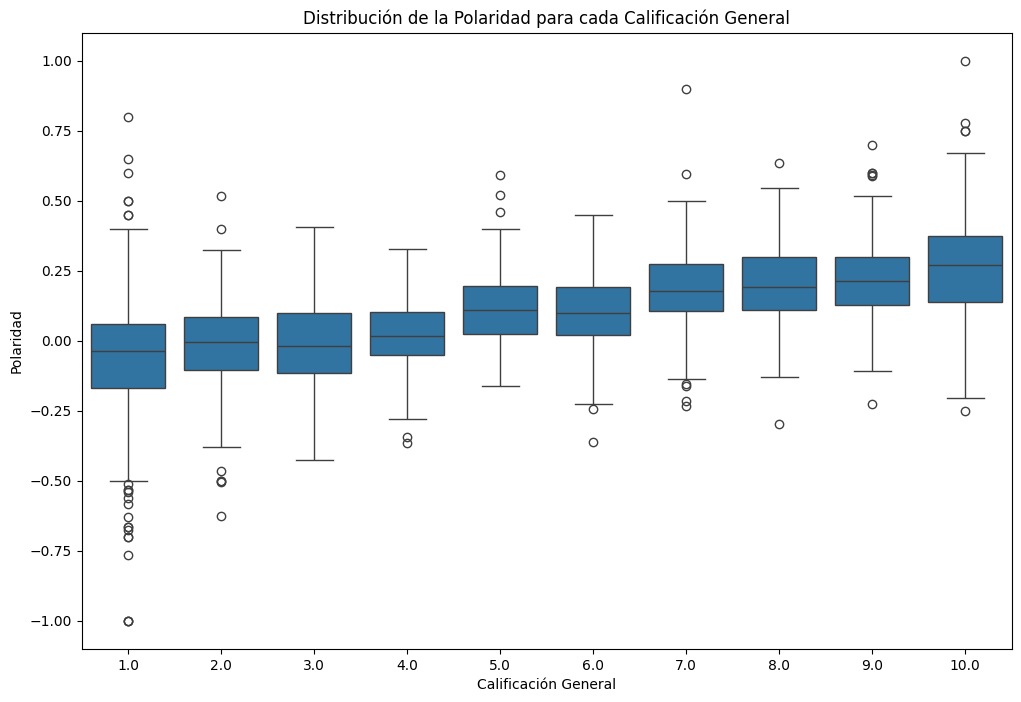

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión entre polaridad y calificación general
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Rating', y='polarity', data=df)
plt.title('Polaridad vs. Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Boxplot entre polaridad y calificación general
plt.figure(figsize=(12, 8))
sns.boxplot(x='Overall Rating', y='polarity', data=df)
plt.title('Distribución de la Polaridad para cada Calificación General')
plt.xlabel('Calificación General')
plt.ylabel('Polaridad')
plt.show()

# Función para clasificar el sentimiento basado en la polaridad
def classify_sentiment(polarity):
    if polarity < 0:
        return 'Negativo'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positivo'

# Crear una nueva columna para la clasificación del sentimiento
df['Sentiment_polarity'] = df['polarity'].apply(classify_sentiment)

#### Limpieza y preparacion de los datos

In [7]:
# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text

# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Clasificación de Reseñas basada en Sentiment_polarity
def classify_review(row):
    if row['Sentiment_polarity'] == 'Negativo':
        return 'Negativo'
    elif row['Sentiment_polarity'] == 'Positivo':
        return 'Positivo'
    else:
        return '[Negativo]' # aca hay que elegir si las que no clasifican se quedan como negativo o positivo - son las neutrales pero de sentiment_polarity asi que no nec son negativas. Al observar el EDA llegamos a la conclusion de que las neutrales que quedaron sin clasificarse como pos o neg son neg.

# Sentiment se convierte en Sentiment_polarity
df['Sentiment'] = df['Sentiment_polarity']

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)

# Dividir el dataset en entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Codificar las etiquetas de sentimiento
label_encoder = LabelEncoder()
train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])
test_df['Sentiment'] = label_encoder.transform(test_df['Sentiment'])

X_train = train_df['Comment_cleaner']
y_train = train_df['Sentiment']
X_test = test_df['Comment_cleaner']
y_test = test_df['Sentiment']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-22020188754a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Rating'] = df['Overall Rating'].astype(int)
<ipython-input-7-22020188754a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))
<ipython-input-7-22020188754a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

#### Queda decidir que se hace con las Neutral: si se eliminan es mas exacto el dataset y la clasificacion porque pos son pos y neg son neg. Si se elige la opcion de reetiquetarlos como pos o neg habria que analizar si las neutrales estan mas cerca de ser pos o neg.

Clasificación de Reseñas Basada en Sentiment_polarity
2. Clasificación Binaria (Eliminando Neutrales vs. Reclasificando Neutrales)
Eliminando Neutrales:

Si eliminas las reseñas neutras, reduces el dataset, pero puede mejorar la precisión en una tarea de clasificación binaria porque solo te quedas con las clases más claramente definidas (positivo y negativo).
Ventajas: Reduces la ambigüedad, el modelo puede tener un mejor desempeño en distinguir entre positivo y negativo.
Desventajas: Podrías perder una cantidad significativa de datos si hay muchas reseñas neutras.
Reclasificando Neutrales:

Clasificar las reseñas neutras como positivas o negativas puede aumentar el dataset, pero introduces ruido si estas clasificaciones no son claras.
Ventajas: Utilizas todo el dataset.
Desventajas: Podrías introducir ambigüedad y ruido, lo que podría dificultar al modelo distinguir entre positivo y negativo.
Recomendación:

Para mayor exactitud: Es mejor eliminar las reseñas neutras.
Para mayor uso de datos: Reclasificar neutros, pero esto requiere cuidado en cómo se realiza la reclasificación.
Si decides eliminar las reseñas neutras:

python
Copiar código









In [ ]:
#OPCION 1
# Filtrar las reseñas neutras
df = df[df['Sentiment_polarity'] != 'Neutral']

# Aplicar la función de clasificación (sin neutrales)
def classify_review(row):
    if row['Sentiment_polarity'] == 'Negativo':
        return 'Negativo'
    else:
        return 'Positivo'

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)
Si decides reclasificar las reseñas neutras:
#OPCION 2

# Clasificación de Reseñas basada en Sentiment_polarity
def classify_review(row):
    if row['Sentiment_polarity'] == 'Negativo':
        return 'Negativo'
    elif row['Sentiment_polarity'] == 'Positivo':
        return 'Positivo'
    else:
        return 'Positivo'  # O 'Negativo' según tu preferencia

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)
El enfoque que elijas depende de tus prioridades y del balance entre precisión y cantidad de datos que prefieras para tu modelo de clasificación binaria.

#### No usar, viejo

In [3]:
#NO USAR
# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text

# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#Una vez que el modelo funcione me gustaria mejorar esta parte para que negativas y falsas neutras que son negativas sean la misma variable. (Segun sentiment_polarity, las palabras en lugar del rating.)
# Clasificación de Reseñas
def classify_review(row):
    if row['Overall Rating'] <= 4.0 or row['Sentiment'] == 'Negativo':
        return 'Negativo'
    elif row['Overall Rating'] >= 7.0:
        return 'Positivo'
    else:
        return 'Positivo'  # Falsas neutras se tratan como positivas

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)

# Filtrar solo las reseñas Positivas y Negativas para el análisis
df = df[df['Sentiment'] != 'Neutral']

# Dividir el dataset en entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Codificar las etiquetas de sentimiento
label_encoder = LabelEncoder()
train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])
test_df['Sentiment'] = label_encoder.transform(test_df['Sentiment'])

X_train = train_df['Comment_cleaner']
y_train = train_df['Sentiment']
X_test = test_df['Comment_cleaner']
y_test = test_df['Sentiment']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-2a7504a85c22>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Rating'] = df['Overall Rating'].astype(int)
<ipython-input-3-2a7504a85c22>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))
<ipython-input-3-2a7504a85c22>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

KeyError: 'Sentiment'

In [3]:

# Clasificación de Reseñas
#def classify_review(row):
 #   if row['Overall Rating'] <= 4.0:
#        return 'Negativo'
#    elif row['Overall Rating'] >= 7.0:
#        return 'Positivo'
#    else:
#        return 'Neutral'

# Aplicar la función de clasificación
#df['Sentiment'] = df.apply(classify_review, axis=1)

# Filtrar solo las reseñas Positivas y Negativas para el análisis
#df = df[df['Sentiment'] != 'Neutral']

# Dividir el dataset en entrenamiento y prueba
#train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Codificar las etiquetas de sentimiento
#label_encoder = LabelEncoder()
#train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])
#test_df['Sentiment'] = label_encoder.transform(test_df['Sentiment'])

#X_train = train_df['Comment_cleaner']
#y_train = train_df['Sentiment']
#X_test = test_df['Comment_cleaner']
#y_test = test_df['Sentiment']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-54c404394163>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Rating'] = df['Overall Rating'].astype(int)
<ipython-input-3-54c404394163>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))
<ipython-input-3-54c404394163>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

### Balanceo de clases utilizando RandomOverSampler

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Balancear las clases antes de la tokenización
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Convertir el resultado de nuevo a series de pandas
X_train_resampled = pd.Series(X_train_resampled.flatten())
y_train_resampled = pd.Series(y_train_resampled)

print(f'Resampled dataset shape: {Counter(y_train_resampled)}')


Resampled dataset shape: Counter({1: 1065, 0: 1065, 2: 1065})


In [11]:
!pip install --upgrade transformers
!pip show torch


Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision


### Tokenización y entrenamiento del modelo BERT

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
# Importar el modelo BERT para clasificación de secuencias
#from transformers import TFBertForSequenceClassification
# Clase wrapper para TFBertForSequenceClassification
class MyTFBertForSequenceClassification(TFBertForSequenceClassification):
  @tf.autograph.experimental.do_not_convert
  def call(self, inputs, **kwargs):
        return super().call(inputs, **kwargs)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Cargar el modelo BERT para clasificación de secuencias con la clase wrapper
model = MyTFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

#Para evitar el error por la diferencia en el numero de etiquetas, num_label,
#la capa de clasificación que se añade al final del modelo no tiene los mismos pesos que en el modelo preentrenado.
#Esto se debe a que el número de etiquetas de clasificación (num_labels) puede ser diferente en la tarea específica de clasificación.
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)


# Cargar el modelo BERT para clasificación de secuencias
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    validation_data=(test_encodings['input_ids'], test_labels),
    epochs=3,
    batch_size=16
)


All PyTorch model weights were used when initializing MyTFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model MyTFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR 1

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3
WARNING:tensorflow:AutoGraph could not transform <function infer_framework at 0x7b8277252b00> and will run it as-is.
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
WARNING: AutoGraph could not transform <function infer_framework at 0x7b8277252b00> and will run it as-is.
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert --

-------
------------------------------------------

El mensaje de advertencia que estás viendo es común al cargar un modelo BERT preentrenado en TensorFlow desde la biblioteca Transformers de Hugging Face.

La razón de esta advertencia es que, aunque el modelo BERT se inicializa correctamente con los pesos preentrenados, la capa de clasificación que se añade al final del modelo no tiene los mismos pesos que en el modelo preentrenado. Esto se debe a que el número de etiquetas de clasificación (`num_labels`) puede ser diferente en tu tarea específica de clasificación.

La advertencia no afecta el entrenamiento del modelo, pero si deseas eliminarla, puedes ignorarla utilizando la siguiente configuración:

```python
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)
```

Puedes agregar este código antes de cargar el modelo BERT para suprimir las advertencias. Sin embargo, ten en cuenta que esto solo oculta las advertencias y no cambia el comportamiento del modelo.

Por lo tanto, tu código para entrenar el modelo debería funcionar correctamente a pesar de la advertencia. Una vez que termine el entrenamiento, puedes evaluar el modelo y generar métricas de rendimiento utilizando el conjunto de prueba.

ERROR 2

Con esta estructura, la función call dentro de MyTFBertForSequenceClassification tendrá la anotación que evita la conversión a gráfico de TensorFlow. Esto debería solucionar el problema que estás enfrentando con el modelo BERT.

### Tokenizacion y entrenamiento: mismo paso que el anterior pero viendo las 12 capas

Visualización de las 12 Capas y Embeddings en la Opción 1
Para visualizar las 12 capas y los embeddings en la opción 1 del código que ya venías trabajando, debes modificar el modelo para que devuelva los hidden_states. Aquí está cómo hacerlo:

Configurar el modelo para devolver hidden_states:
Modifica la carga del modelo para incluir output_hidden_states=True.

Obtener y visualizar los hidden_states:
Después de pasar los datos a través del modelo, puedes iterar sobre los hidden_states para visualizar las capas.

Aquí está el código modificado:

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Cargar el modelo BERT para clasificación de secuencias con output_hidden_states=True
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, output_hidden_states=True)

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Pasar los datos a través del modelo
train_outputs = model(train_encodings['input_ids'])
test_outputs = model(test_encodings['input_ids'])

#LO NUEVO PARA VISUALIZAR LAS 12 CAPAS
# Obtener los hidden_states
train_hidden_states = train_outputs.hidden_states
test_hidden_states = test_outputs.hidden_states

# Visualizar las dimensiones de cada capa: aca iteramos
for i, layer in enumerate(train_hidden_states):
    print(f"Layer {i}: {layer.shape}")

# Obtener los embeddings de la última capa
last_layer_embeddings = train_hidden_states[-1]
print("Embeddings from the last layer:", last_layer_embeddings)


## Evaluacion del modelo

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(test_encodings['input_ids'], test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_encodings['input_ids']).logits
predicted_labels = tf.argmax(predictions, axis=1)

# Mostrar una matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))


### OPCION 2: - la mas manual - BERT Y SUS 12 CAPAS - En caso de querer acceder a las capas internas de Bert para comprenderlo con mayor profundidad

Para acceder a las capas internas de BERT y obtener los embeddings, puedes utilizar el modelo TFBertModel en lugar de TFBertForSequenceClassification. TFBertModel devuelve las salidas de todas las capas de BERT, lo que te permite inspeccionar las 12 capas y los embeddings.

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Cargar el modelo BERT para obtener las salidas de las capas
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

# Obtener las salidas de las capas
def get_bert_embeddings(model, encodings):
    outputs = model(encodings['input_ids'])
    hidden_states = outputs.hidden_states
    return hidden_states

# Obtener las salidas de las capas para el conjunto de entrenamiento
train_hidden_states = get_bert_embeddings(bert_model, train_encodings)
test_hidden_states = get_bert_embeddings(bert_model, test_encodings)

# Visualizar los embeddings de la última capa
last_layer_train = train_hidden_states[-1]  # Última capa del conjunto de entrenamiento
last_layer_test = test_hidden_states[-1]    # Última capa del conjunto de prueba

# Para ver la dimensión de los embeddings
print(f"Dimensiones de los embeddings de la última capa: {last_layer_train.shape}")

# Ejemplo de visualización de los embeddings (reducción de dimensionalidad y plot)
import numpy as np
from sklearn.decomposition import PCA

# Tomar un subconjunto de los embeddings para visualización
embeddings = last_layer_train.numpy()[0]  # Selecciona el primer ejemplo

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotear los embeddings reducidos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
plt.title('Embeddings reducidos con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


Código para visualizar las 12 capas y trabajar con los embeddings

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Función para tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenizar los datos
train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Cargar el modelo BERT para obtener las salidas de las capas
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

# Obtener las salidas de las capas
def get_bert_embeddings(model, encodings):
    outputs = model(encodings['input_ids'])
    hidden_states = outputs.hidden_states
    return hidden_states

# Obtener las salidas de las capas para el conjunto de entrenamiento
train_hidden_states = get_bert_embeddings(bert_model, train_encodings)
test_hidden_states = get_bert_embeddings(bert_model, test_encodings)

# Visualizar los embeddings de todas las capas
for i, layer in enumerate(train_hidden_states):
    print(f"Capa {i} tiene dimensiones: {layer.shape}")

# Para visualizar los embeddings de una capa específica, por ejemplo, la última capa
last_layer_train = train_hidden_states[-1]  # Última capa del conjunto de entrenamiento

# Reducir la dimensionalidad y visualizar los embeddings
def visualize_embeddings(embeddings, title):
    # Selecciona el primer ejemplo
    example_embeddings = embeddings.numpy()[0]

    # Reducción de dimensionalidad con PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(example_embeddings)

    # Plotear los embeddings reducidos
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
    plt.title(title)
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    plt.show()

# Visualizar la última capa
visualize_embeddings(last_layer_train, 'Embeddings de la última capa con PCA')

# Si deseas concatenar las capas o hacer operaciones sobre ellas
def concatenate_layers(hidden_states):
    # Concatenar todas las capas
    concatenated_layers = tf.concat(hidden_states, axis=-1)
    return concatenated_layers

# Concatenar todas las capas
concatenated_embeddings_train = concatenate_layers(train_hidden_states)

print(f"Dimensiones de las capas concatenadas: {concatenated_embeddings_train.shape}")

# Visualizar las capas concatenadas
visualize_embeddings(concatenated_embeddings_train, 'Embeddings concatenados de todas las capas con PCA')


Notas importantes:
Iteración sobre las capas:

hidden_states es una lista de tensores, donde cada tensor representa las salidas de una capa de BERT. Iteramos sobre esta lista para acceder a las salidas de cada capa.
Visualización de las capas:

Usamos PCA para reducir la dimensionalidad de los embeddings a 2 dimensiones y luego los ploteamos para visualizarlos.
Concatenación de capas:

Las capas se pueden concatenar a lo largo del eje de características (axis=-1) para combinar las representaciones de todas las capas.
Conclusión
Este enfoque te permite visualizar y analizar las salidas de todas las capas de BERT, así como trabajar con los embeddings generados por estas capas. Puedes adaptar y extender este código para realizar análisis más profundos según tus necesidades.

### OPCION 3: Implementacion automatica - se le pueden agregar las opciones de visualizar las 12 capas y los embeddings

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, TFTrainer, TFTrainingArguments
import tensorflow as tf

# Cargar el tokenizador y el modelo
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenizar los datos
train_encodings = tokenizer(X_train_resampled.tolist(), truncation=True, padding=True, max_length=512, return_tensors='tf')
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512, return_tensors='tf')

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Configuración de los argumentos del entrenamiento
training_args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Crear el dataset de entrenamiento y evaluación
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(len(train_labels)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(16)

# Inicializar el entrenador
trainer = TFTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Entrenar el modelo
trainer.train()


Puntos Clave del Código:
Tokenización:

train_encodings y test_encodings se generan a partir de las listas de textos de entrenamiento y prueba respectivamente, asegurando que los datos estén truncados y rellenados correctamente para el modelo BERT.
Conversión de Etiquetas:

Las etiquetas de entrenamiento y prueba se convierten en tensores para que puedan ser utilizados por TensorFlow.
Configuración de Argumentos de Entrenamiento:

TFTrainingArguments se utiliza para definir parámetros importantes del entrenamiento, como el número de épocas, el tamaño del batch, y la tasa de aprendizaje.
Creación del Dataset:

Los datasets de entrenamiento y evaluación se crean utilizando tf.data.Dataset.from_tensor_slices, que toma los diccionarios de los encodings y las etiquetas correspondientes.
shuffle se utiliza en el dataset de entrenamiento para mezclar los datos antes de cada epoch.
Inicialización y Entrenamiento:

TFTrainer se inicializa con el modelo, los argumentos de entrenamiento y los datasets.
trainer.train() se llama para comenzar el proceso de entrenamiento.
¿Por Qué Esta Opción es Recomendada?
Automatización: Esta implementación utiliza TFTrainer, que automatiza muchos aspectos del entrenamiento, haciéndolo más simple y menos propenso a errores.
Flexibilidad: Permite ajustes fáciles a los hiperparámetros y la configuración de entrenamiento sin cambiar el código principal.
Modularidad: Puedes fácilmente cambiar el modelo o el tokenizador sin grandes modificaciones en el código.
Escalabilidad: Facilita el uso de técnicas avanzadas de entrenamiento y evaluación proporcionadas por Hugging Face.
Opciones Adicionales:
Visualización de Capas: Si necesitas acceder a las representaciones de las capas intermedias de BERT, podrías ajustar el modelo para devolver estas salidas. Esto generalmente se hace modificando el código del modelo o usando características avanzadas de los Transformers.

Embeddings: Si solo necesitas los embeddings, puedes extraerlos directamente desde el modelo usando el método outputs.hidden_states después de realizar una pasada hacia adelante con los datos.

Implementar visualización de capas y obtener embeddings adicionales pueden ser tareas complementarias que puedes agregar dependiendo de tus necesidades específicas para el análisis y la investigación.

Visualización de Capas y Embeddings
Primero, asegúrate de configurar el modelo para que devuelva los hidden_states. Puedes hacer esto utilizando output_hidden_states=True al cargar el modelo.

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, TFTrainer, TFTrainingArguments
import tensorflow as tf

# Cargar el tokenizador y el modelo con output_hidden_states=True
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, output_hidden_states=True)

# Tokenizar los datos
train_encodings = tokenizer(X_train_resampled.tolist(), truncation=True, padding=True, max_length=512, return_tensors='tf')
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512, return_tensors='tf')

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Configuración de los argumentos del entrenamiento
training_args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Crear el dataset de entrenamiento y evaluación
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)).shuffle(len(train_labels)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels)).batch(16)

# Inicializar el entrenador
trainer = TFTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Entrenar el modelo
trainer.train()

# Función para obtener embeddings y visualizar capas
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    hidden_states = outputs.hidden_states
    return hidden_states

# Ejemplo de uso
text_example = "This is an example review for testing."
hidden_states = get_embeddings(text_example)

# Visualizar las dimensiones de cada capa
for i, layer in enumerate(hidden_states):
    print(f"Layer {i}: {layer.shape}")

# Obtener los embeddings de la última capa
last_layer_embeddings = hidden_states[-1]
print("Embeddings from the last layer:", last_layer_embeddings)


Desglose del Código:
Cargar el Modelo con output_hidden_states:

Se configura output_hidden_states=True para que el modelo devuelva las salidas de cada capa.
Función para Obtener Embeddings y Visualizar Capas:

La función get_embeddings toma un texto de entrada, lo tokeniza y obtiene las hidden_states del modelo.
Se itera sobre hidden_states para visualizar las dimensiones de cada capa.
Visualización de Capas:

Se imprime la forma de cada capa para verificar las dimensiones.
Se obtienen los embeddings de la última capa (hidden_states[-1]).
Modificaciones y Verificaciones:
Verificación de Capas: Puedes verificar que cada capa tenga las dimensiones correctas (ej. batch_size x sequence_length x hidden_size).
Embeddings: Utilizar los embeddings de la última capa para tareas adicionales o análisis.
Modificaciones: Basado en la visualización, puedes ajustar el modelo o el proceso de tokenización si encuentras inconsistencias.
Este enfoque te permite usar una implementación automatizada y eficiente, pero con la flexibilidad de inspeccionar y modificar las capas y embeddings según sea necesario.

### Resumen de las 3 opciones

1. Código Original para Trabajar con BERT
Este es el código que ya tenías, enfocado en la clasificación de secuencias con BERT.

Ventajas:

Simplicidad: Es directo y fácil de entender, adecuado para tareas de clasificación estándar.
Menos Código: Menos líneas de código, lo que puede hacer que sea más fácil de mantener.
Desventajas:

Menos Control: No proporciona acceso a las salidas intermedias de las capas de BERT.
Limitado a la Clasificación: Menos flexible si deseas realizar otras tareas o análisis detallados.
2. Código que Muestra las 12 Capas de BERT
Este código proporciona acceso a las salidas de todas las capas de BERT y permite realizar operaciones avanzadas como la concatenación de capas.

Ventajas:

Mayor Control: Puedes acceder y manipular las salidas de todas las capas de BERT.
Flexibilidad: Adecuado para tareas de análisis avanzado o investigación.
Visualización: Permite visualizar las representaciones de las capas, lo cual es útil para entender mejor cómo BERT procesa la información.
Desventajas:

Complejidad: Es más complejo y requiere más código.
Requiere Conocimiento Avanzado: Necesitas un mayor entendimiento de BERT y sus capas.
3. Implementación Más Automática y Menos Manual de BERT
Podrías usar herramientas y bibliotecas de alto nivel que abstraen muchos de los detalles de implementación. Por ejemplo, usar transformers con Trainer y TFTrainer de Hugging Face para una implementación más automatizada.

Ventajas:

Automatización: Facilita el entrenamiento y evaluación de modelos sin necesidad de manejar muchos detalles.
Facilidad de Uso: Simplifica el proceso con menos código.
Ecosistema de Herramientas: Aprovecha las herramientas avanzadas del ecosistema Hugging Face.
Desventajas:

Menos Flexibilidad: Menos control sobre las capas intermedias y salidas detalladas.
Menos Personalización: Puede ser menos adecuado para personalizaciones avanzadas o análisis detallados.
Recomendación
Si buscas simplicidad y tu objetivo principal es la clasificación de textos, opción 1 (el código original) es probablemente la mejor elección. Es directo y hace bien su trabajo sin complicaciones adicionales.

Si estás interesado en investigación o análisis detallado de cómo BERT procesa la información, opción 2 (código que muestra las 12 capas de BERT) sería más adecuada. Te proporciona un mayor nivel de control y flexibilidad para realizar análisis avanzados.

Si prefieres una implementación más automatizada y sencilla de manejar, opción 3 (uso de herramientas automatizadas de Hugging Face) sería ideal. Esto es especialmente útil si quieres aprovechar las herramientas avanzadas y la simplicidad de uso sin preocuparte por los detalles internos.

## VERSION 3

### 1. Balancear las Clases

In [7]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Balancear las clases antes de la tokenización
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Convertir el resultado de nuevo a series de pandas
X_train_resampled = pd.Series(X_train_resampled.flatten())
y_train_resampled = pd.Series(y_train_resampled)

print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

Resampled dataset shape: Counter({1: 909, 0: 909})


### 2. Tokenización y Entrenamiento del Modelo BERT

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Cargar el modelo BERT para clasificación de secuencias
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    validation_data=(test_encodings['input_ids'], test_labels),
    epochs=3,
    batch_size=16
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### 3. Evaluación del Modelo y Métricas Adicionales

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(test_encodings['input_ids'], test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_encodings['input_ids']).logits
predicted_labels = tf.argmax(predictions, axis=1)

# Mostrar una matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))


## Version 2

### Preprocesamiento y Clasificación de Reseñas

In [6]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text


# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Clasificación de Reseñas
def classify_review(row):
    if row['Overall Rating'] <= 4.0:
        return 'Negativo'
    elif row['Overall Rating'] >= 7.0:
        return 'Positivo'
    else:
        return 'Neutral'

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)

# Filtrar solo las reseñas Positivas y Negativas para el análisis
df = df[df['Sentiment'] != 'Neutral']

# Codificar las etiquetas de sentimiento
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# División del dataset en conjuntos de entrenamiento y prueba
X = df['Comment_cleaner']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Aplicar SMOTE para manejar el desbalance de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(pd.DataFrame(X_train), y_train)
X_train_resampled = X_train_resampled[0]

print(f'Resampled dataset shape: {Counter(y_train_resampled)}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-6-c7699f089996>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Rating'] = df['Overall Rating'].astype(int)
<ipython-input-6-c7699f089996>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))
<ipython-input-6-c7699f089996>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

ValueError: could not convert string to float: 'dortmundkrakow rtn avoided ryanair aggressive policy decided give try finally ryanair understood free seating leading scrum longest time allocated seating decent fees big improvement onboard harassed lottery constant announcements buying anymore leg room stays problem though press passengers boeing wouldnt bear frflight longer two hours decent experience less euro rtn two including bag priority boarding worked well isnt really necessary anymore allocated seating reserved seat reserve seat time booking check days prior departure well worth extra fee people complain cant print boarding passes away home'

El error se debe a que SMOTE requiere que las características (features) sean numéricas, mientras que estamos trabajando con texto. Para resolver esto, necesitamos primero convertir el texto en una representación numérica. Normalmente, para modelos como BERT, utilizamos tokenización y embeddings para manejar el texto.

Dado que SMOTE no se puede aplicar directamente a texto, una forma de manejar el desbalance es tokenizar el texto primero y luego aplicar técnicas de oversampling como SMOTE en las características tokenizadas. Sin embargo, en este caso, es más práctico balancear las clases antes de la tokenización.

### Tokenización y Entrenamiento del Modelo BERT

In [ ]:
# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews, tokenizer, max_length=512):
    return tokenizer(
        reviews.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )

train_encodings = encode_reviews(X_train_resampled, tokenizer)
test_encodings = encode_reviews(X_test, tokenizer)

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(y_train_resampled.values)
test_labels = tf.convert_to_tensor(y_test.values)

# Cargar el modelo BERT para clasificación de secuencias
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    validation_data=(test_encodings['input_ids'], test_labels),
    epochs=3,
    batch_size=16
)


### Evaluación del Modelo y Métricas Adicionales

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(test_encodings['input_ids'], test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_encodings['input_ids']).logits
predicted_labels = tf.argmax(predictions, axis=1)

# Mostrar una matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))


## version 1

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar las stopwords si aún no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto de las reseñas
def review_cleaning(text):
    text = str(text).lower()  # Convertir el texto a minúsculas
    text = re.sub('\[.*?\]', '', text)  # Eliminar texto dentro de corchetes
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Eliminar enlaces
    text = re.sub('<.*?>+', '', text)  # Eliminar etiquetas HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Eliminar puntuación
    text = re.sub('\n', '', text)  # Eliminar saltos de línea
    text = re.sub('\w*\d\w*', '', text)  # Eliminar palabras que contienen números
    return text


# Eliminar registros con valores nulos en 'Overall Rating' y 'Comment'
df = df.dropna(subset=['Overall Rating', 'Comment'])

# Asegúrate de que 'Overall Rating' es de tipo entero
df['Overall Rating'] = df['Overall Rating'].astype(int)

# Aplicar la función de limpieza a la columna 'Comment' y crear una nueva columna 'Comment_cleaner'
df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))

# Eliminar stopwords
df['Comment_cleaner'] = df['Comment_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Clasificación de Reseñas
def classify_review(row):
    if row['Overall Rating'] <= 4.0:
        return 'Negativo'
    elif row['Overall Rating'] >= 7.0:
        return 'Positivo'
    else:
        return 'Neutral'

# Aplicar la función de clasificación
df['Sentiment'] = df.apply(classify_review, axis=1)

# Filtrar solo las reseñas Positivas y Negativas para el análisis
df = df[df['Sentiment'] != 'Neutral']

# Dividir el dataset en entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Codificar las etiquetas de sentimiento
label_encoder = LabelEncoder()
train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])
test_df['Sentiment'] = label_encoder.transform(test_df['Sentiment'])

# Cargar el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
def encode_reviews(reviews):
    return tokenizer(reviews.tolist(), truncation=True, padding=True, max_length=512, return_tensors='tf')

train_encodings = encode_reviews(train_df['Comment_cleaner'])
test_encodings = encode_reviews(test_df['Comment_cleaner'])

# Convertir las etiquetas a tensores
train_labels = tf.convert_to_tensor(train_df['Sentiment'].values)
test_labels = tf.convert_to_tensor(test_df['Sentiment'].values)

# Cargar el modelo BERT para clasificación de secuencias
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    validation_data=(test_encodings['input_ids'], test_labels),
    epochs=3,
    batch_size=16
)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_encodings['input_ids'], test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_encodings['input_ids']).logits
predicted_labels = tf.argmax(predictions, axis=1)

# Mostrar una matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-13-af74fd4e86cf>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overall Rating'] = df['Overall Rating'].astype(int)
<ipython-input-13-af74fd4e86cf>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment_cleaner'] = df['Comment'].apply(lambda x: review_cleaning(x))
<ipython-input-13-af74fd4e86cf>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# The end

#Primer Acercamiento

# Extracción de Características: vectorización


Convertiremos el texto limpio en formatos numéricos que los modelos de machine learning pueden procesar utilizando diferentes técnicas de vectorización.

### Comparativa de Métodos de Extracción de Características
- **Bag of Words**: Crea un vocabulario de todas las palabras únicas en el dataset y usa la frecuencia de las palabras como características. Es simple pero efectiva para muchos problemas de NLP.
- **TF-IDF**: Similar a BoW pero ajusta las frecuencias según la importancia de las palabras en los documentos. Es útil para resaltar palabras que son más relevantes en un contexto específico.

Ambas técnicas tienen sus ventajas y son ampliamente utilizadas en tareas de NLP. La elección entre ellas depende del contexto específico y de los objetivos del análisis.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer()
X_bow_train = vectorizer_bow.fit_transform(train_df['clean_review'])
X_bow_test = vectorizer_bow.transform(test_df['clean_review'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf_train = vectorizer_tfidf.fit_transform(train_df['clean_review'])
X_tfidf_test = vectorizer_tfidf.transform(test_df['clean_review'])

# Comparación de características extraídas
print("Número de características en BoW:", X_bow_train.shape[1])
print("Número de características en TF-IDF:", X_tfidf_train.shape[1])

## Visualización de características para cada review - BoW

In [ ]:
import pandas as pd

# Obteniendo nombres de las características (palabras) para BoW
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Convertir una fila de la matriz BoW a DataFrame para una visualización más fácil
def bow_to_df(row_index):
    row = X_bow_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_bow, 'Frequency': row})
    return df[df['Frequency'] > 0]  # Filtrar por frecuencias mayores a cero

# Visualizar la conversión BoW de una revisión específica
example_bow = bow_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_bow

## Visualización de características para cada review - TFIDF

In [ ]:
# Obteniendo nombres de las características (palabras) para TF-IDF
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Convertir una fila de la matriz TF-IDF a DataFrame para una visualización más fácil
def tfidf_to_df(row_index):
    row = X_tfidf_train[row_index].toarray().flatten()  # Convierte a array y aplana
    df = pd.DataFrame({'Word': feature_names_tfidf, 'TF-IDF Value': row})
    return df[df['TF-IDF Value'] > 0]  # Filtrar por valores TF-IDF mayores a cero

# Visualizar la conversión TF-IDF de una revisión específica
example_tfidf = tfidf_to_df(0)  # Cambia 0 por otro índice si es necesario
print(train_df['clean_review'][0])
example_tfidf

## Visualización de distribución de palabras - BoW

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_bow_train)

## Visualización de distribución de palabras - TF-IDF

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(vectorizer, feature_matrix, top_n=20):
    sum_words = feature_matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='PuBuGn_d')
    plt.title('Top Words in Corpus')
    plt.show()

# Ejemplo de uso con BoW
plot_top_words(vectorizer_bow, X_tfidf_train)

## Entrenamiento de modelo de regresión logística basado en BoW

In [ ]:
train_df

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Dividir los datos en conjuntos de entrenamiento y prueba (80:20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Transformación de textos en matrices de características (BoW)
vectorizer = CountVectorizer()
X_bow_train = vectorizer.fit_transform(train_df['Comment_cleaner'])
X_bow_test = vectorizer.transform(test_df['Comment_cleaner'])

# Alternativamente, puedes usar TF-IDF
# vectorizer = TfidfVectorizer()
# X_tfidf_train = vectorizer.fit_transform(train_df['Comment'])
# X_tfidf_test = vectorizer.transform(test_df['Comment'])

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_bow_train, train_df['Sentiment_polarity'])

# Evaluación del modelo
predictions = model.predict(X_bow_test)
print(classification_report(test_df['Sentiment_polarity'], predictions))

## Entrenamiento de modelo de regresión logística basado en TFIDF

In [ ]:
#Alternativamente, puedes usar TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(train_df['Comment_cleaner'])
X_tfidf_test = vectorizer.transform(test_df['Comment_cleaner'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_tfidf_train, train_df['Sentiment_polarity'])  # Asumiendo que 'label' es la etiqueta de sentimiento

# Evaluación del modelo
predictions = model.predict(X_tfidf_test)
print(classification_report(test_df['Sentiment_polarity'], predictions))

# Word Embeddings

Los embeddings de palabras son representaciones vectoriales densas que capturan relaciones semánticas entre palabras. Exploraremos dos enfoques populares: GloVe y Word2Vec

### Modelo de embeddings preentrenado



GloVe es un modelo de embeddings de palabras que se desarrolló como una alternativa a las técnicas tradicionales de modelado de palabras como Word2Vec. Fue introducido por investigadores de la Universidad de Stanford en un intento de combinar lo mejor de dos mundos en el campo de los embeddings de palabras: los métodos basados en la matriz de co-ocurrencia y los métodos predictivos.

Los embeddings preentrenados de GloVe están disponibles públicamente y pueden ser cargados fácilmente usando bibliotecas como `gensim` o directamente en frameworks de deep learning como TensorFlow y PyTorch. Estos modelos están entrenados en varios corpus y están disponibles en múltiples dimensiones, lo que permite a los investigadores y desarrolladores elegir el que mejor se adapte a sus necesidades específicas.


In [ ]:
# Cargar embeddings preentrenados de GloVe
glove_vectors = api.load("glove-twitter-25")

# Función para obtener el vector promedio para una reseña
def document_vector(doc):
    # Quitar palabras que no están en el vocabulario de embeddings
    words = [word for word in doc.split() if word in glove_vectors.key_to_index]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return []

# Aplicar la función a las reseñas limpias
train_df['doc_vector'] = train_df['Comment_cleaner'].apply(document_vector)
test_df['doc_vector'] = test_df['Comment_cleaner'].apply(document_vector)

# Verificar que los vectores estén correctamente calculados
train_df.head()

In [ ]:
print(f'Ejemplo de vector:\n\n {train_df["doc_vector"][0]}')
print(f'\nTamaño del embedding: {len(train_df["doc_vector"][0])}')

### Modelo de embeddings preentrenado - Word2Vec

Para mejorar la eficiencia y efectividad de nuestras aplicaciones de NLP, podemos utilizar modelos de Word2Vec que han sido preentrenados en grandes datasets. Esto nos permite aprovechar embeddings de palabras que capturan relaciones semánticas complejas, sin necesidad de un extenso entrenamiento en nuestros propios datos.

El modelo preentrenado de Google News contiene 300 vectores dimensionales entrenados en un conjunto de datos de aproximadamente 100 mil millones de palabras.


In [ ]:
# Cargar el modelo preentrenado de Word2Vec
word2vec_model_pretrained = api.load("word2vec-google-news-300")

In [ ]:
# Ejemplo de uso: obtener el vector para una palabra
word = 'computer'
word_vector = word2vec_model_pretrained[word]  # Vector de 'computer'
print(f"Vector for '{word}':\n {word_vector}\n")
print(f"Embedding size for '{word}': {len(word_vector)}")  # Imprimir el tamaño del embedding

# Utilizar el modelo para buscar palabras similares
similar_words = word2vec_model_pretrained.most_similar('computer', topn=10)

# Imprimir palabras similares y sus vectores
print(f"\nTop 10 similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word} (similarity: {similarity})")

### Entrenamiento de Word2Vec


Además de usar embeddings preentrenados, entrenaremos nuestro modelo Word2Vec con el corpus del dataset.

In [ ]:
# Entrenar modelo Word2Vec
sentences = [review.split() for review in train_df['Comment_cleaner']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)

# Función para convertir una reseña en un vector promedio usando nuestro modelo Word2Vec
def vectorize_review(review, model):
    words = [word for word in review.split() if word in model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0) #Promedio de todos los vectores (embedding de cada palabra)
    else:
        return np.zeros(model.vector_size)

train_df['word2vec_vector'] = train_df['Comment_cleaner'].apply(lambda x: vectorize_review(x, word2vec_model))
test_df['word2vec_vector'] = test_df['Comment_cleaner'].apply(lambda x: vectorize_review(x, word2vec_model))

# Verificar los vectores generados
train_df.head()

### Comparativa de Embeddings

- **GloVe**: Utiliza información estadística del corpus completo para producir embeddings que capturan relaciones globales entre palabras. Es muy útil cuando la relación semántica global es crucial.
- **Word2Vec**: Aprende embeddings que reflejan relaciones contextuales locales. Es poderoso para captar matices en usos específicos de palabras en contextos similares.

Cada técnica tiene sus fortalezas dependiendo de la naturaleza del problema y los datos disponibles. GloVe es ideal para capturar relaciones semánticas en un nivel macro, mientras que Word2Vec es excelente para entender contextos específicos.


# Reducción de dimensionalidad y visualización en el espacio con t-SNE y UMAP


t-Distributed Stochastic Neighbor Embedding (t-SNE) y Uniform Manifold Approximation and Projection (UMAP) son técnicas de reducción de dimensionalidad que son particularmente efectivas para visualizar datos de alta dimensión, como embeddings de palabras o documentos. A diferencia del PCA, que es lineal, t-SNE y UMAP son técnicas no lineales que preservan mejor la estructura local de los datos.

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

# Preparar datos para t-SNE
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Sentiment_polarity']

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# Visualización de t-SNE
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title('t-SNE visualization of Document Embeddings')
plt.show()

### UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap

# Preparar datos para UMAP
X = np.array(list(train_df['word2vec_vector']))
y = train_df['Sentiment_polarity']

# Aplicar UMAP
reducer = umap.UMAP(random_state=42)
X_reduced_umap = reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced_umap[:, 0], y=X_reduced_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP Visualization of Document Embeddings')
plt.show()

## Modelado para Análisis de Sentimientos usando embeddings



Finalmente, usaremos los vectores de características generados para entrenar un modelo de clasificación y evaluar su desempeño.

### Entrenamiento GloVe

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['doc_vector']))
X_test = np.array(list(test_df['doc_vector']))
y_train = train_df['Sentiment_polarity'].values
y_test = test_df['Sentiment_polarity'].values

# Entrenar un modelo de regresión logística con los vectores de GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train, y_train)

# Predicciones y evaluación
predictions_glove = model_glove.predict(X_test)
print(classification_report(y_test, predictions_glove))

### Entrenamiento Word2Vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir listas de vectores a arrays para el modelado
X_train = np.array(list(train_df['word2vec_vector']))
X_test = np.array(list(test_df['word2vec_vector']))
y_train = train_df['Sentiment_polarity']
y_test = test_df['Sentiment_polarity']

# Entrenar un modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones y evaluación
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Modelos de redes neuronales para NLP

## Modelo RNN Simple

**Descripción General**
Las Redes Neuronales Recurrentes (RNN) son una clase de redes neuronales diseñadas específicamente para trabajar con secuencias de datos, como series temporales o secuencias lingüísticas. La característica distintiva de las RNN es su capacidad de mantener un estado interno o memoria que les permite procesar entradas secuenciales de manera efectiva.

**Características Principales**
- **Recurrencia**: En las RNN, las salidas de ciertas neuronas se retroalimentan a la entrada de estas durante el proceso de aprendizaje, lo que les permite 'recordar' información previa.
- **Capacidad de modelado de secuencia**: Son capaces de modelar dependencias temporales en los datos, lo que es crucial para tareas como la predicción de series temporales y el procesamiento del lenguaje natural.

**Ventajas**
- **Flexibilidad en la longitud de la entrada**: Las RNN pueden manejar entradas de longitud variable, lo que es ideal para procesar oraciones de longitud diversa o series temporales de distintos períodos.
- **Aplicabilidad en tareas de secuencia**: Eficientes en tareas donde la secuencialidad de los datos es importante, como el análisis de texto y el reconocimiento de voz.

**Desventajas**
- **Problema del desvanecimiento del gradiente**: Durante el entrenamiento, las RNN pueden sufrir de desvanecimiento o explosión del gradiente, lo que dificulta aprender dependencias a largo plazo.
- **Costo computacional**: El entrenamiento puede ser computacionalmente costoso y lento debido a las dependencias entre los cálculos de las etapas temporales.

**Usos Comunes**
- Procesamiento del lenguaje natural, como la generación de texto y la traducción automática.
- Análisis de series temporales en finanzas o medicina.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparación de datos
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Comment_cleaner'])
sequences = tokenizer.texts_to_sequences(train_df['Comment_cleaner'])
X_train = pad_sequences(sequences, maxlen=100)
y_train = train_df['Sentiment_polarity'].values

# Construcción del modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 64, input_length=100))
model_rnn.add(SimpleRNN(50))  # 50 unidades RNN
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entrenamiento del modelo
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

**Tokenizacion**
La primera etapa en el procesamiento del texto implica convertir las reseñas en una forma que la red neuronal pueda procesar. Utilizamos un `Tokenizer` de Keras, que nos permite convertir el texto en secuencias de enteros. Aquí, cada entero representa una palabra única en el corpus. Para este modelo, limitamos el número de palabras más frecuentes a considerar a 5,000.

**Conversión de Texto a Secuencias**
Convertimos los textos en listas de índices de palabras. Estas secuencias son las que alimentarán a la red neuronal.

**Padding de Secuencias**
Para asegurar que todas las entradas de la red tengan el mismo tamaño, utilizamos el padding de las secuencias a la misma longitud (100 palabras en este caso), cortando las secuencias más largas o rellenando con ceros las más cortas.

**Labels**
Los labels o etiquetas de las reseñas se preparan para el entrenamiento, asegurando que sean adecuados para un problema de clasificación binaria.

**Capa de Embedding**
La capa de Embedding en Keras es utilizada para convertir índices enteros (los identificadores de cada palabra en el vocabulario) en vectores densos de tamaño fijo. Actúa como una tabla de búsqueda que mapea los índices de palabras a vectores densos. Estos vectores son aprendidos durante el entrenamiento del modelo.

## Modelo LSTM

**Long Short-Term Memory Networks (LSTM)**

**Descripción General**
Las LSTM son una extensión de las redes neuronales recurrentes que intentan resolver el problema del desvanecimiento del gradiente incorporando 'puertas' que regulan el flujo de información. Estas puertas permiten que las LSTM retengan información útil a largo plazo y descarten la que no lo es.

**Características Principales**
- **Puertas de olvido, entrada y salida**: Estas puertas controlan respectivamente la memoria que se descarta, la nueva información que se añade y la información que se pasa a la siguiente etapa de la secuencia.
- **Capacidad de retención a largo plazo**: Gracias a estas puertas, las LSTM pueden mantener dependencias de largo plazo de manera más efectiva que las RNN simples.

**Ventajas**
- **Mejor en aprender dependencias a largo plazo**: Pueden aprender patrones a largo plazo en los datos, lo que es crucial en muchas aplicaciones de NLP y series temporales.
- **Prevención del desvanecimiento del gradiente**: Las puertas específicas ayudan a mitigar los problemas de desvanecimiento o explosión del gradiente.

**Desventajas**
- **Complejidad y coste computacional**: Las LSTM son más complejas y requieren más tiempo y recursos computacionales para entrenar que las RNN simples.
- **Diseño más complejo**: La arquitectura de las LSTM es más difícil de implementar y afinar debido a la mayor cantidad de parámetros y configuraciones.

**Usos Comunes**
- Modelado de lenguaje y aplicaciones de texto donde las dependencias de largo plazo son críticas.
- Predicciones en problemas de series temporales complejas.


In [ ]:
from tensorflow.keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 64, input_length=100))
model_lstm.add(LSTM(50))  # 50 unidades LSTM
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

# Entrenamiento del modelo
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64)

## Evaluación y comparativa de Modelos


Utilizaremos varias métricas clave para evaluar y comparar los modelos de RNN, LSTM y BERT. Estas métricas incluyen la precisión (accuracy), el recall, el F1-score y la matriz de confusión.

In [ ]:

# Tokenización y padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Comment_cleaner'])
X_train = tokenizer.texts_to_sequences(train_df['Comment_cleaner'])
X_test = tokenizer.texts_to_sequences(test_df['Comment_cleaner'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

y_train = train_df['Sentiment_polarity'].values
y_test = test_df['Sentiment_polarity'].values

# Definir y entrenar un modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(len(np.unique(y_train)), activation='softmax'))
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Definir y entrenar un modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(len(np.unique(y_train)), activation='softmax'))
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)  # Obtener la clase con mayor probabilidad
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    return accuracy, recall, f1, conf_matrix, class_report

# Evaluar RNN
accuracy_rnn, recall_rnn, f1_rnn, conf_matrix_rnn, class_report_rnn = evaluate_model(model_rnn, X_test, y_test)
# Evaluar LSTM
accuracy_lstm, recall_lstm, f1_lstm, conf_matrix_lstm, class_report_lstm = evaluate_model(model_lstm, X_test, y_test)

# Imprimir los resultados
print("RNN Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_rnn, recall_rnn, f1_rnn))
print("RNN Model - Confusion Matrix:\n", conf_matrix_rnn)
print("RNN Model - Classification Report:\n", class_report_rnn)

print("LSTM Model - Accuracy: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_lstm, recall_lstm, f1_lstm))
print("LSTM Model - Confusion Matrix:\n", conf_matrix_lstm)
print("LSTM Model - Classification Report:\n", class_report_lstm)

### Comparativa de Modelos
- **RNN**: Más rápido de entrenar, pero puede tener dificultades con dependencias de largo plazo debido al desvanecimiento del gradiente.
- **LSTM**: Mejor en la captura de dependencias de largo plazo que RNN y adecuado para secuencias más largas.

La elección del modelo depende de las especificaciones del proyecto, los recursos disponibles y la naturaleza del problema de NLP a resolver.


# Implementación Text Retrieval

## Recuperación de Texto con TF-IDF

TF-IDF, que significa "Term Frequency-Inverse Document Frequency", es una técnica de vectorización de texto que refleja la importancia de una palabra en un documento en relación con una colección de documentos o corpus. Esta técnica es especialmente útil en la recuperación de información para evaluar la relevancia de un documento dado una consulta de búsqueda.

### Implementación de Recuperación de Texto con TF-IDF

La implementación de recuperación de texto utilizando TF-IDF implica varios pasos clave que incluyen la preparación de los datos, la vectorización y el proceso de recuperación basado en la similitud del coseno.

1. **Preparación de Datos**: Es esencial que los datos estén limpios y preprocesados, lo cual incluye la eliminación de stopwords, la tokenización y la normalización de texto (como convertir a minúsculas).

2. **Vectorización de Documentos**: Usamos TF-IDF para convertir los documentos de texto en vectores numéricos. TF-IDF penaliza las palabras que aparecen muy frecuentemente en el corpus y que son, por lo tanto, menos informativas.

3. **Consulta y Recuperación**: Para una consulta dada, transformamos la consulta en un vector utilizando el mismo vectorizador TF-IDF. Luego, empleamos la similitud del coseno para encontrar los documentos que son más similares a la consulta.


In [ ]:
df.columns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['Comment_cleaner'])

# Función para buscar en el dataset
def text_retrieval(query, tfidf_vectorizer, tfidf_matrix, top_n=5):
    # Vectorizar la consulta utilizando el mismo vectorizador TF-IDF
    query_vector = tfidf_vectorizer.transform([query])

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval("amazing", tfidf_vectorizer, tfidf_matrix)
relevant_reviews[['Comment_cleaner']]

## Recuperación de Texto con Word2Vec

Word2Vec es una técnica de modelado de lenguaje que aprende embeddings de palabras en un espacio vectorial de dimensiones fijas a partir de grandes corpus de texto. Cada palabra se representa por un vector, y las palabras con contextos similares en el corpus tienden a tener vectores similares, lo que refleja sus significados semánticos. Esta característica hace de Word2Vec una herramienta útil para tareas de recuperación de texto, donde queremos encontrar documentos relevantes basados en la similitud semántica más que en coincidencias exactas de palabras.

### Implementación de Recuperación de Texto con Word2Vec

Para implementar la recuperación de texto utilizando Word2Vec, seguimos estos pasos:

1. **Preparación de Datos**: Asegúrate de tener un modelo de Word2Vec entrenado disponible. Este modelo es utilizado para convertir el texto de los documentos en vectores.

2. **Vectorización de Documentos**: Convertimos cada documento en un vector promedio de todos los embeddings de las palabras contenidas en el documento. Esto nos da una representación densa y significativa del contenido de cada texto.

3. **Consulta y Recuperación**: Para una consulta dada, convertimos el texto de la consulta en su vector correspondiente usando el mismo modelo de Word2Vec. Luego calculamos la similitud del coseno entre el vector de la consulta y los vectores de todos los documentos en el dataset para determinar cuáles son los más relevantes.


In [ ]:
# Función para obtener el vector promedio de Word2Vec para un documento
def document_vector_word2vec(doc, model):
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Crear una matriz de características con todos los documentos vectorizados
doc_vectors = np.array([document_vector_word2vec(doc, word2vec_model) for doc in train_df['Comment_cleaner']])

# Función para buscar en el dataset
def text_retrieval_word2vec(query, model, doc_vectors, top_n=5):
    query_vector = document_vector_word2vec(query, model)
    query_vector = query_vector.reshape(1, -1)  # Reshape para compatibilidad con cosine_similarity

    # Calcular la similitud del coseno entre la consulta y todos los documentos
    cosine_similarities = cosine_similarity(query_vector, doc_vectors).flatten()

    # Obtener los índices de los documentos en orden de relevancia
    relevant_indices = np.argsort(cosine_similarities)[::-1][:top_n]

    # Retornar los documentos más relevantes
    return train_df.iloc[relevant_indices]

# Ejemplo de uso: buscar reseñas relacionadas con la palabra "amazing"
relevant_reviews = text_retrieval_word2vec("amazing", word2vec_model, doc_vectors)
relevant_reviews[['Comment_cleaner']]